# Analysis of Polymer Data
Data and methodology taken from: Estimation and Prediction of the Polymers’ Physical Characteristics Using the Machine Learning Models Polymers 2024, 16(1), 115; https://doi.org/10.3390/polym16010115.

Github repository: https://github.com/catauggie/polymersML/tree/main

The goal of this notebook is to look at our transformed and pre-processed data and identify which subsets are useful targets for the Machine Learning Tradjectory. 

In [1]:
# Go ahead and import the data into a dataframe and then make sure its imported properly by listing the first few lines
import pandas as pd
poly_data = pd.read_excel('resulting_dataset_vector.xlsx')

In [2]:
poly_data.head()

,Unnamed: 0,polymer_name,Number of features,Features names,Electric conductivity_value_median,Gas diffusion coefficient d_value_median,Crystallization kinetics k_value_median,Thermal decomposition weight loss_value_median,Dynamic flexural properties loss tanget_value_median,Gas permeability coefficient p_value_median,...,Hansen parameter delta-d: dispersion component_value_variance,G value_value_variance,Compressibility_value_variance,Crystallization kinetics half time of crystallization_value_variance,Hansen parameter delta p polar_value_variance,Melting temperature_value_variance,Tensile stress strength at break_value_variance,Thermal diffusivity_value_variance,Dynamic shear properties loss tangent_value_variance,vector
0,0,polyethene,93,"['Density', 'Specific volume', 'Refractive ind...",1.700000e-15,1.100000e-07,0.06170,10.0,0.090,3.150000e-13,...,0.0,52.912889,0.154127,7.863615e+05,96.333333,491.180091,0.578258,2.824603e-11,1.657087,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,poly(prop-1-ene),86,"['Density', 'Specific volume', 'Refractive ind...",2.000000e-15,1.995000e-07,0.00134,10.0,0.087,1.130000e-13,...,NaN,0.000000,0.176377,7.550705e+06,NaN,858.887332,0.057751,2.206914e-14,21.445644,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,poly(but-1-ene),41,"['Density', 'Specific volume', 'Refractive ind...",NaN,NaN,0.11000,NaN,NaN,2.995000e-13,...,NaN,NaN,0.000990,3.603378e+05,NaN,433.580267,0.007295,6.750000e-16,NaN,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,poly(pent-1-ene),16,"['Density', 'Specific volume', 'Glass transiti...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,405.956400,0.000004,NaN,NaN,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,poly(3-methylbut-1-ene),15,"['Density', 'Specific volume', 'Glass transiti...",NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,715.929894,NaN,NaN,NaN,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Using Python's list comprehension feature we filter columns in the DataFrame and then select those filtered columns from the DataFrame.

* `poly_data.columns` returns an Index object containing the column labels of the DataFrame.
* The list comprehension `[c for c in poly_data.columns if 'value_median' in c]` iterates over all column names in poly_data.columns. For each column name (c), it checks if the substring 'value_median' is present in the column name. If yes, that column name is included in the output list. The result is a list of column names that contain the substring `value_median`.
* cols_value_median is the variable that stores the list of column names generated by the list comprehension. These are all the columns whose names include `value_median`.
* Finally, `poly_data[cols_value_median]` selects the columns in `poly_data` whose names are in `cols_value_median`. This is done by passing the list of column names (`cols_value_median`) to the DataFrame `poly_data`. The output is a DataFrame consisting only of the columns whose names contain `value_median`.

In [3]:
cols_value_median = [c for c in poly_data.columns if 'value_median' in c]
poly_data[cols_value_median]

,Electric conductivity_value_median,Gas diffusion coefficient d_value_median,Crystallization kinetics k_value_median,Thermal decomposition weight loss_value_median,Dynamic flexural properties loss tanget_value_median,Gas permeability coefficient p_value_median,Intrinsic viscosity eta_value_median,Radiation resistance_value_median,Water vapor transmission_value_median,Dynamic viscosity loss tangent_value_median,...,Gas solubility coefficient s_value_median,Hansen parameter delta-d: dispersion component_value_median,G value_value_median,Compressibility_value_median,Crystallization kinetics half time of crystallization_value_median,Hansen parameter delta p polar_value_median,Melting temperature_value_median,Tensile stress strength at break_value_median,Thermal diffusivity_value_median,Dynamic shear properties loss tangent_value_median
0,1.700000e-15,1.100000e-07,0.06170,10.0,0.090,3.150000e-13,1.250,26.00,0.000720,NaN,...,9.400000e-07,0.0,1.95,0.7350,84.9,8.5,131.0,0.02215,1.700000e-07,0.680
1,2.000000e-15,1.995000e-07,0.00134,10.0,0.087,1.130000e-13,1.200,3.59,0.000388,33.0,...,6.730000e-06,NaN,0.08,0.9525,304.0,NaN,163.0,0.03230,1.391000e-07,0.076
2,NaN,NaN,0.11000,NaN,NaN,2.995000e-13,1.095,NaN,0.002330,NaN,...,NaN,NaN,NaN,1.2410,1200.0,NaN,115.5,0.02960,1.005000e-07,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.995,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,80.0,0.01325,NaN,NaN
4,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,306.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18309,2.000000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Load the python dictionary with the categories listed from the json file we exported in the data preparation phase

In [4]:
import json

# Specify the path to your JSON file
json_file_path = 'category_dict.json'

# Load JSON data from the file
with open(json_file_path, 'r') as file:
    data = json.load(file)


In [5]:
# List the categories for which we have sub categories with data in them.
list(data.keys())

['Compression characteristics',
 'Creep characteristics',
 'Dilute solution property',
 'Electric property',
 'Flexural property',
 'Hardness',
 'Heat characteristics',
 'Heat resistance and combustion',
 'Impact strength',
 'Optical property',
 'Other physical property',
 'Physical property',
 'Physicochemical property',
 'Polymer Information',
 'Rheological property',
 'Shear property',
 'Tensile property',
 'Thermal property']

Now its always important to visualize our data. We know we have a very hetrogeneous data set missing many values for each polymer so lets visualize the count of non-null values for specific columns in the DataFrame (`poly_data`) using Matplotlib, a popular plotting library. It's structured to work with data loaded from a JSON file.

Here's a detailed breakdown first of the subsetting and second of the plotting:
1. Imports: 
* import the `matplotlib.pyplot` module: Necessary for creating static, interactive, and animated visualizations in Python.
2. Subset the data:
* Extract keys and values from the loaded JSON data: It assumes that data is a dictionary loaded from a JSON file, where keys represent categories (or any other form of identifiers) and values are lists (assumed to represent column names here).
* Prepare column names for the DataFrame:
    * 'vals[0]' retrieves the first list of columns from the JSON data.
    * 'cols_value_median_with_suffix' creates a new list of column names by appending '_value_median; to each element in 'vals[0]', these are the firt columns that we are interested in from the DataFrame `poly_data`.
* Subset the DataFrame: `subset_df` is created by subsetting poly_data using the prepared column names (`cols_value_median_with_suffix`), aiming to focus on columns that match the criteria (in this case, columns with `_value_median` suffix).
* Count non-null values: `not_none_counts` calculates the count of non-null (i.e., not NaN) entries in each of the specified columns within `subset_df`.
3. Plotting:
A bar chart is created to visualize the count of non-null values for each column.
* The `plt.bar` function generates bars where each bar's height corresponds to the count of non-null values in a column.
* Labels are added to each bar for clarity, displaying the exact count of non-null values.
* The plot includes an x-axis label (`Columns`), a y-axis label (`Number of Not None Values`), and a title that dynamically includes the first category from the JSON data's keys.
* The x-axis labels (column names) are rotated for better readability.
* Saving and showing the plot: `plt.tight_layout()` adjusts the plot parameters to give some padding and prevent overlap.
* The plot is saved as an image file named after the first category key in the JSON data with a "_bar.png" suffix.
* Finally, plt.show() displays the plot.


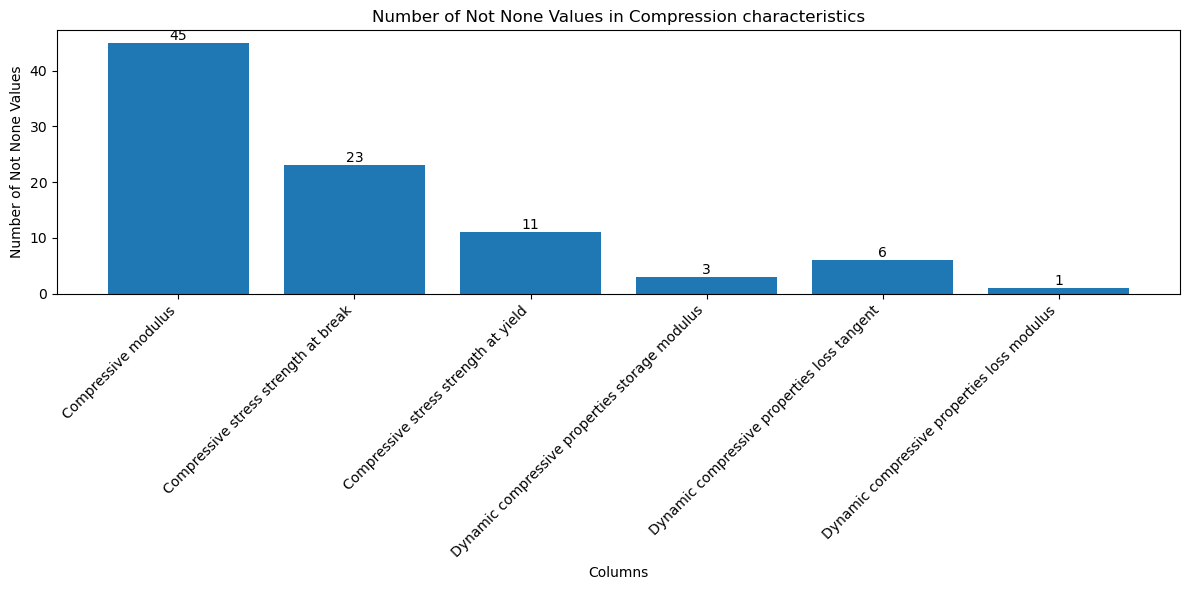

In [6]:
import matplotlib.pyplot as plt

categs = list(data.keys())
vals = list(data.values())


# 'cols_value_median' are the relevant columns from the poly_data dataset
cols_value_median = vals[0] # Including the sub category features from category 1 (index 0) ["Compressive modulus", "Compressive stress strength at break", "Compressive stress strength at yield", "Dynamic compressive properties storage modulus", "Dynamic compressive properties loss tangent", "Dynamic compressive properties loss modulus"]#[c for c in poly_data.columns if 'value_median' in c]
cols_value_median_with_suffix = [c + "_value_median" for c in cols_value_median]

#parts = len(cols_value_median)/14
subset_df = poly_data[cols_value_median_with_suffix]

# Count non-null values in each column
not_none_counts = subset_df.notnull().sum()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(cols_value_median, not_none_counts.values)

# Adding labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Number of Not None Values')
plt.title(f'Number of Not None Values in {categs[0]}')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.savefig(f'{categs[0]}_bar.png')
plt.show()

Improvement on the original code: The original code issued an error on reaching the SMILES data in this itteration we fix the bug and make some improvements to how the data is presented. Each itteration is annotated below to demonstrate the progression. 

#### Fixing the SMILES Bug
To modify the code to skip columns that cause errors, such as the "SMILES" column in our case, we can add a condition to check if the columns exist in your DataFrame before attempting to plot. This way, if a column is missing, the code will simply skip that iteration and move on to the next one without throwing an error.

This approach uses list comprehension to filter out the columns that do not exist in the DataFrame (`poly_data`) from the `cols_value_median_with_suffix` list. If no columns from a particular group are present in the DataFrame, it prints a message indicating the category is being skipped and continues to the next iteration. This should prevent your code from crashing when it encounters missing columns.

# Check if all columns exist in the DataFrame
    existing_cols = [col for col in cols_value_median_with_suffix if col in poly_data.columns]

# Skip plotting if any columns are missing
    if not existing_cols:
        print(f"Skipping {categs[u]} as it contains columns not present in DataFrame")
        continue


* Existence Check for Columns (The first commented line):
This line filters out the columns that do not exist in the DataFrame `poly_data` by checking each modified column name against the DataFrame's columns. The result is a list of existing columns (`existing_cols`) that are present in `poly_data` and relevant to the current category. This step is crucial for ensuring that the subsequent plotting operations only attempt to use data that is actually available, thereby avoiding errors.



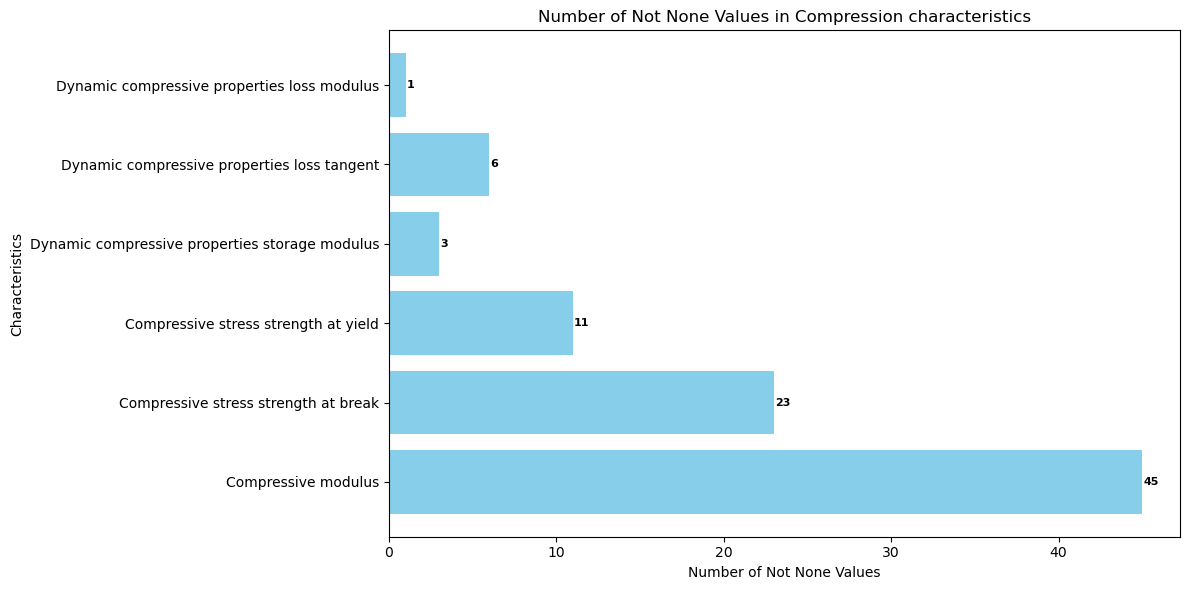

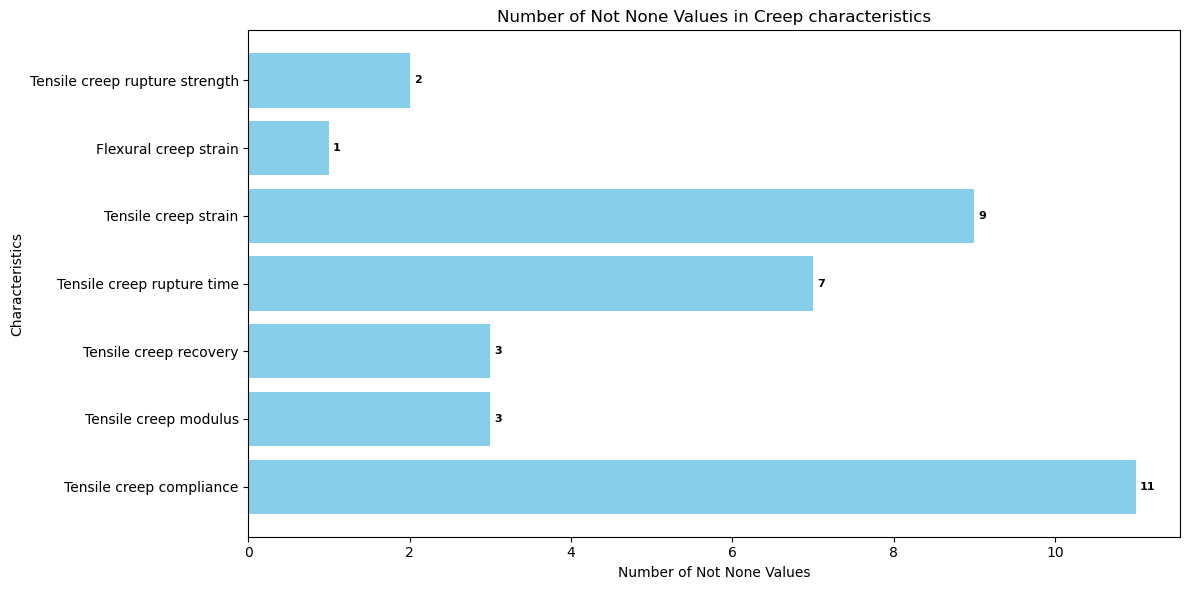

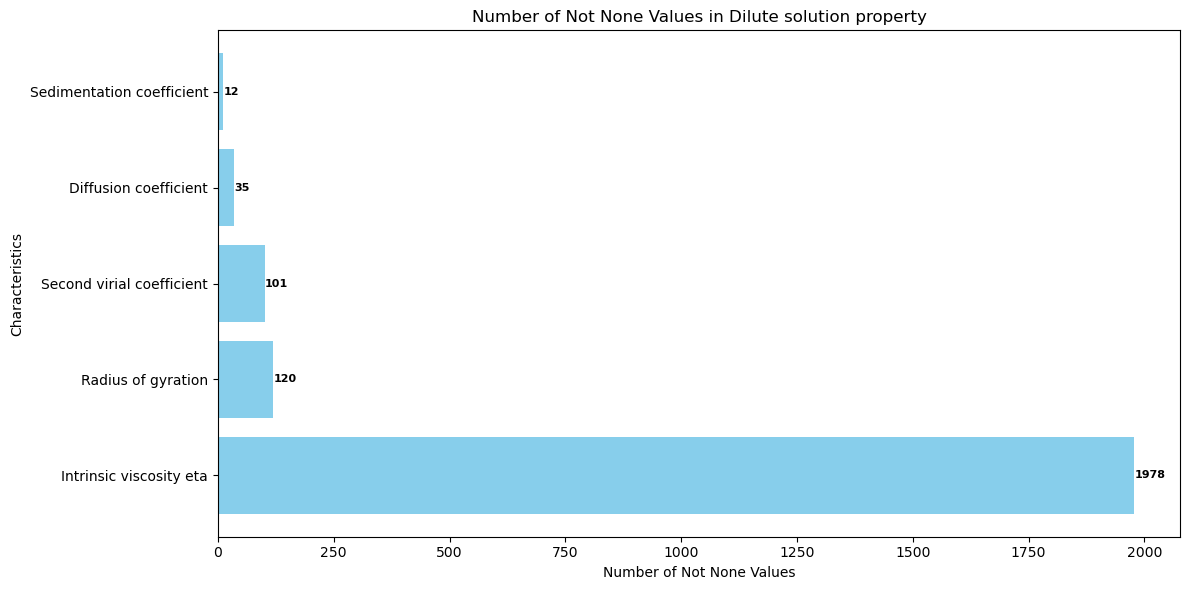

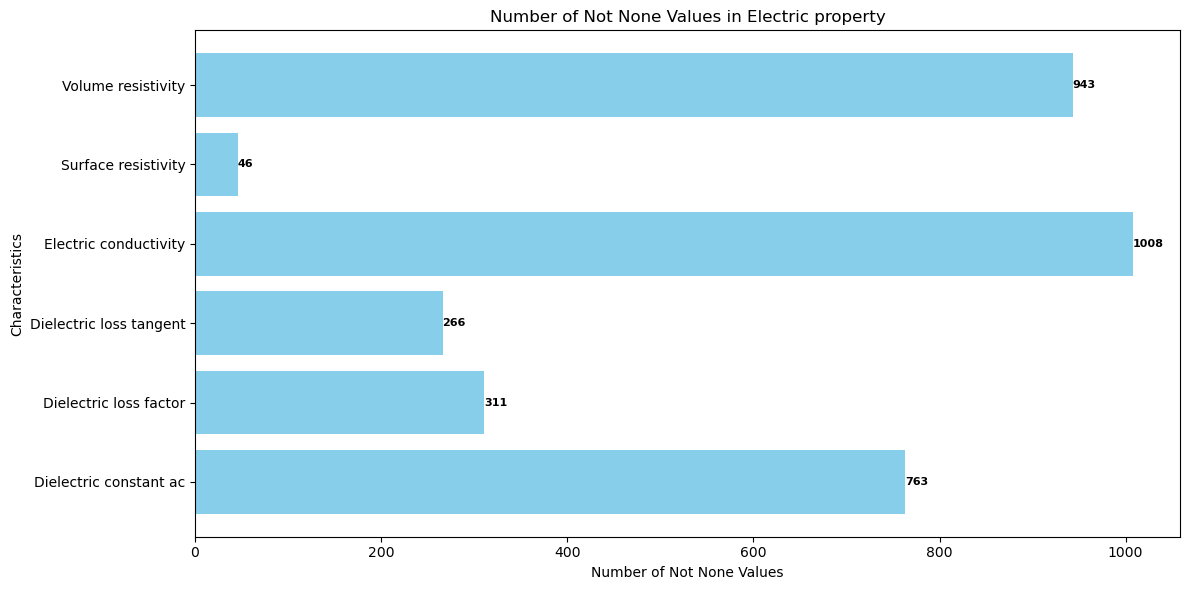

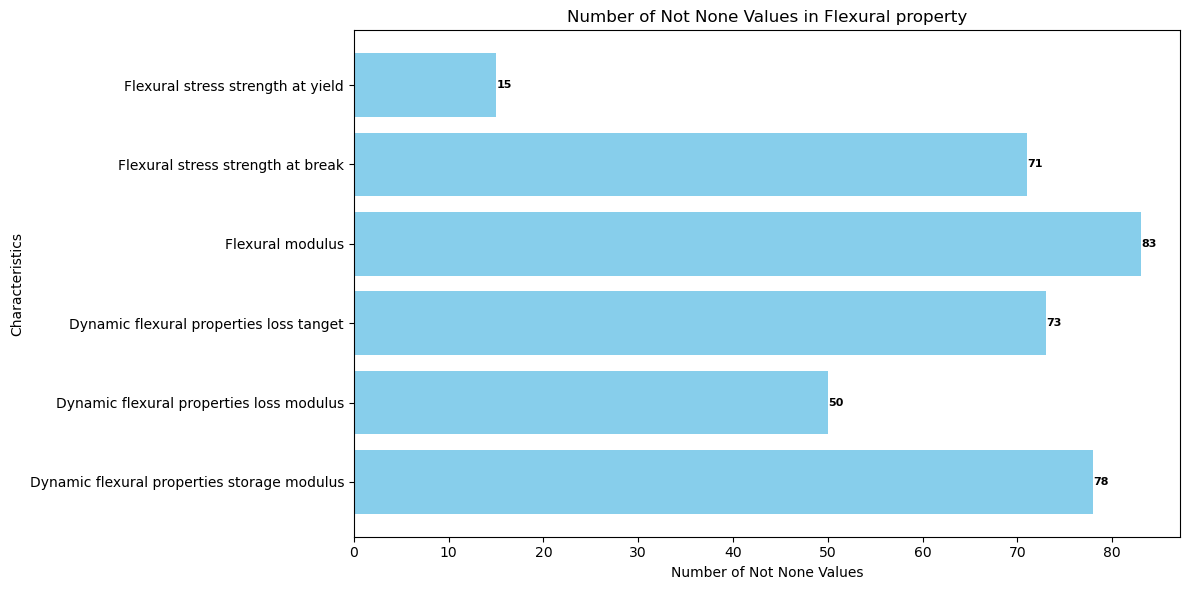

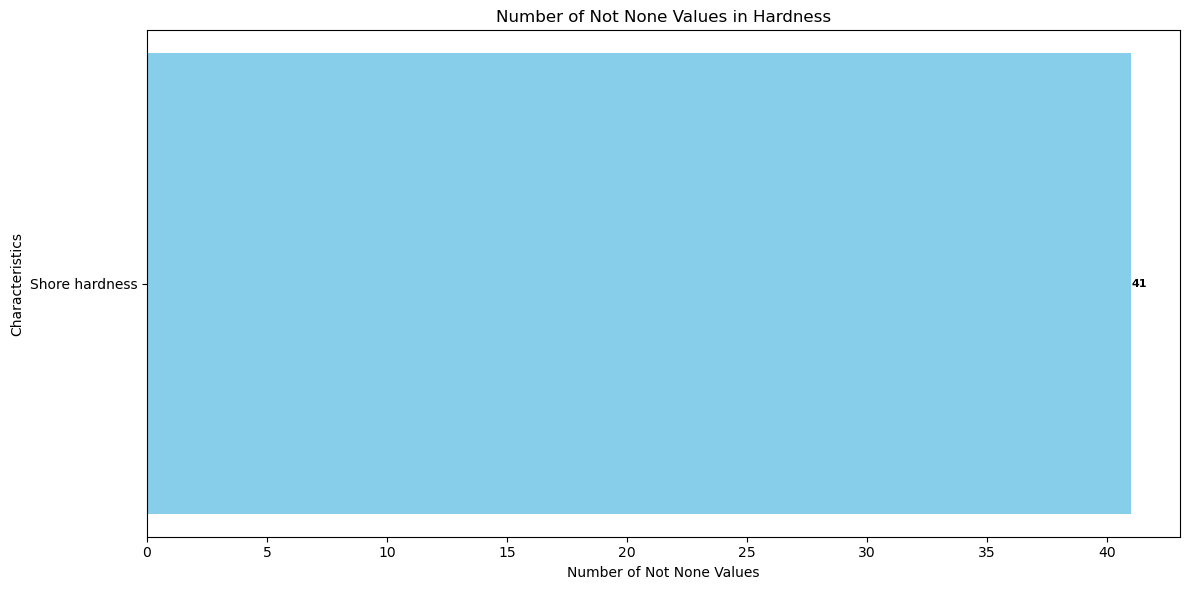

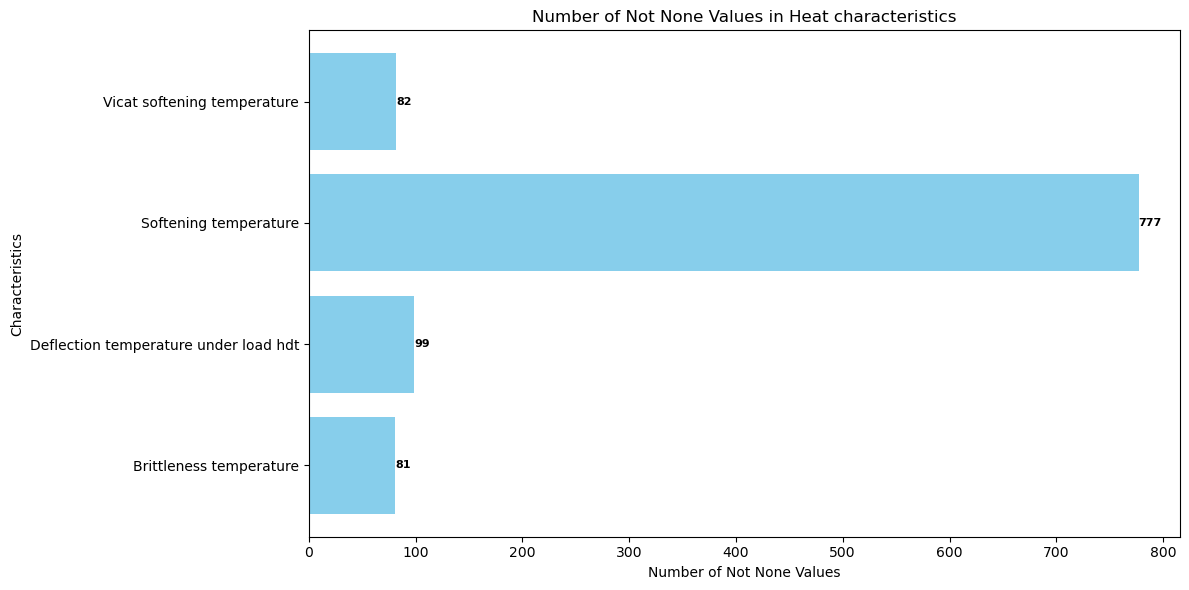

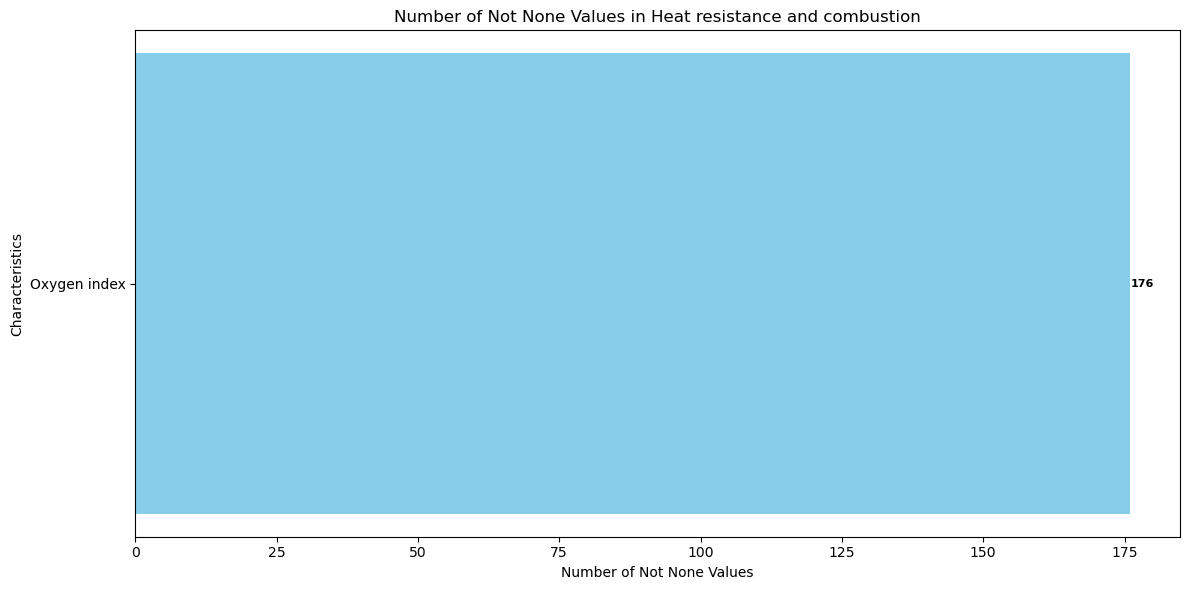

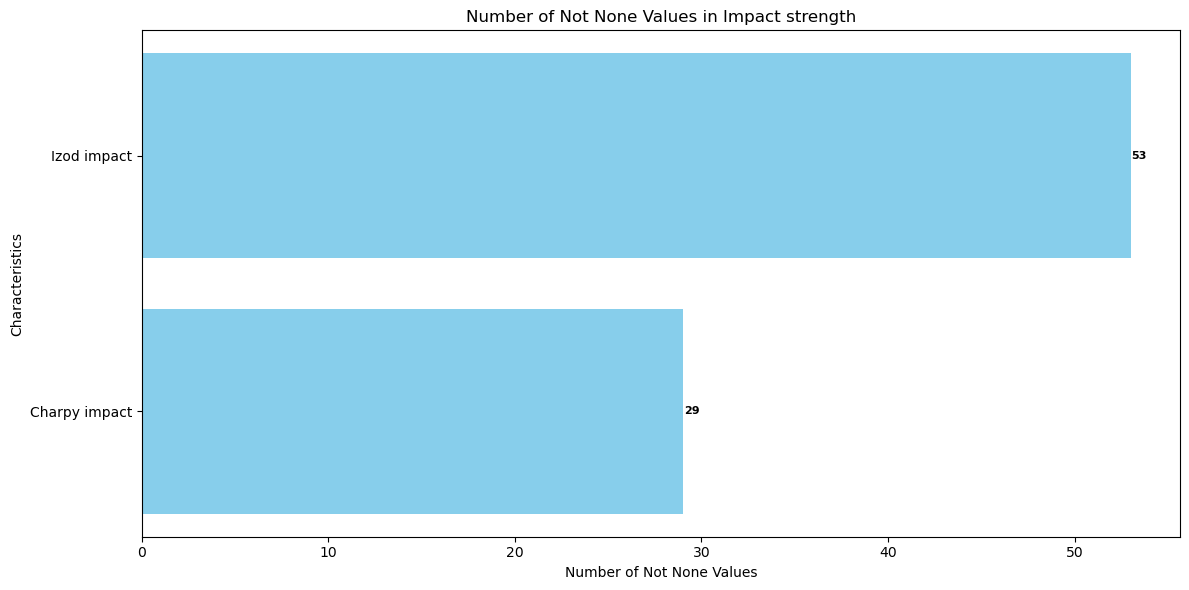

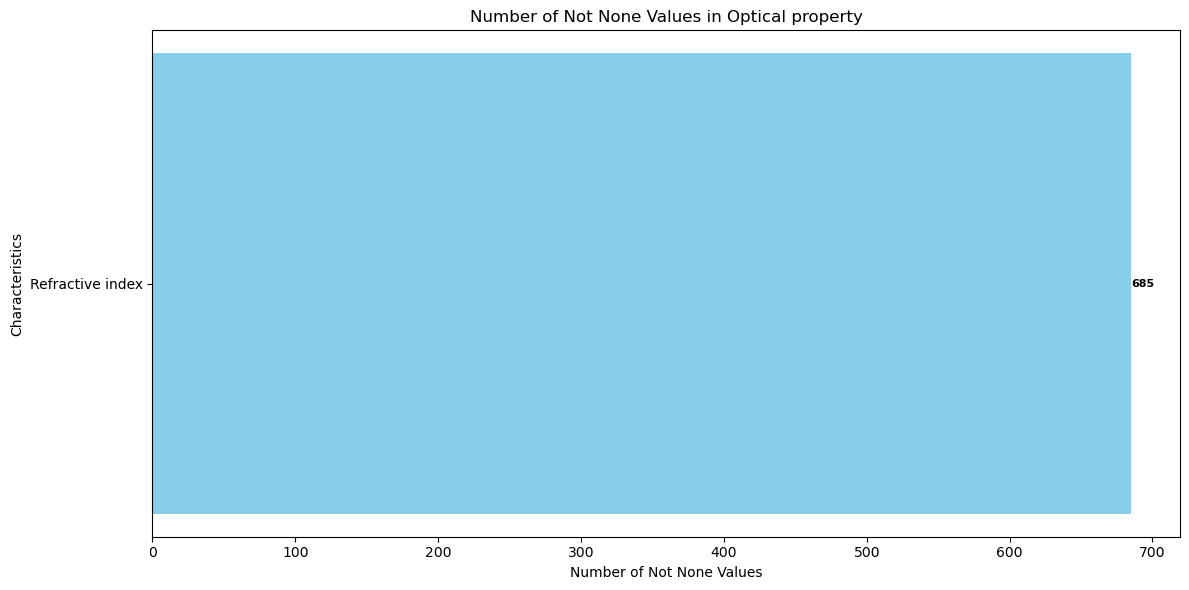

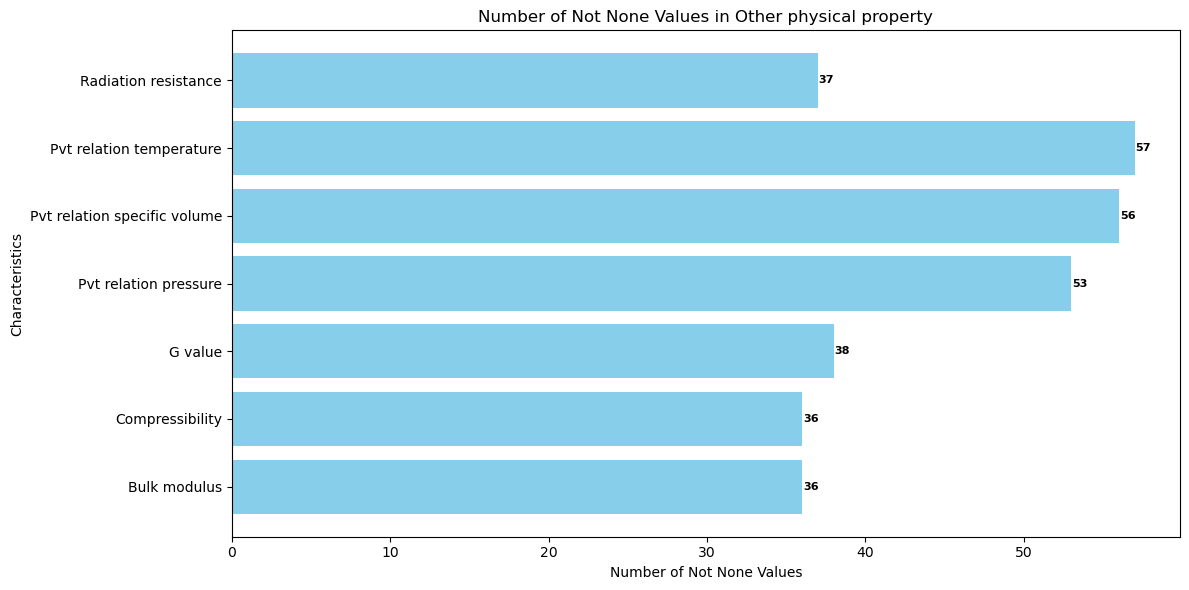

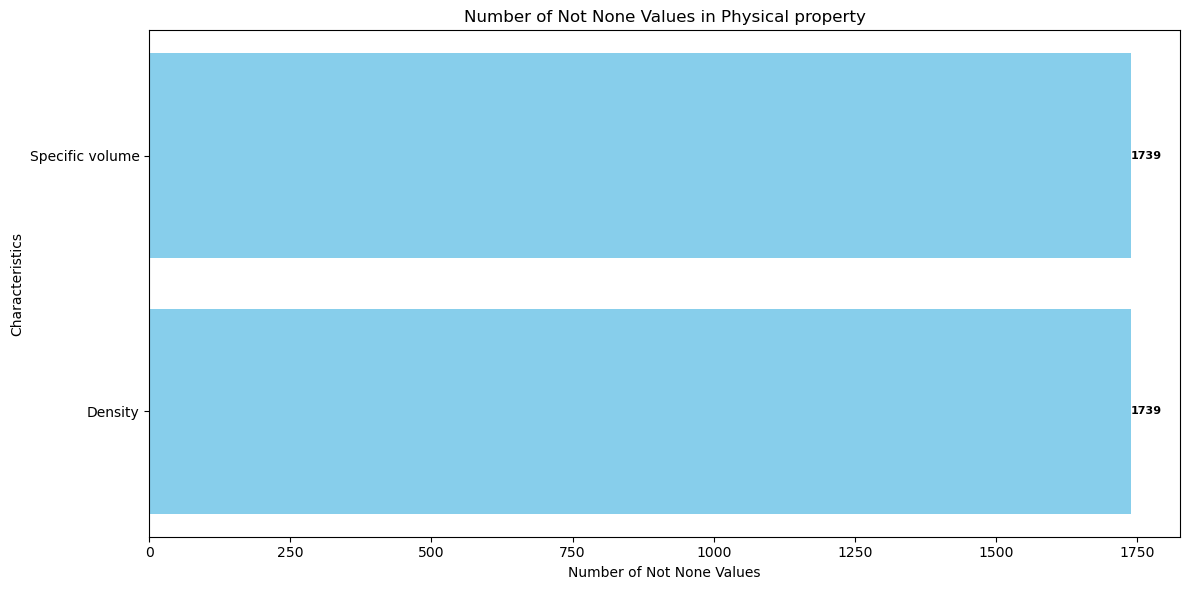

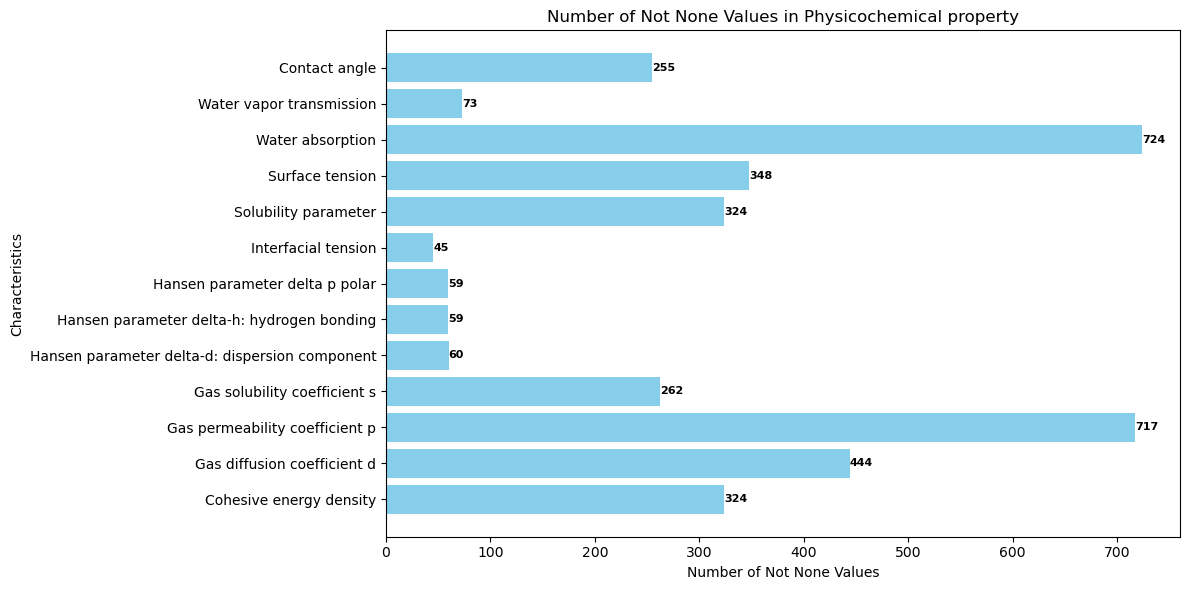

Skipping Polymer Information as it contains columns not present in DataFrame


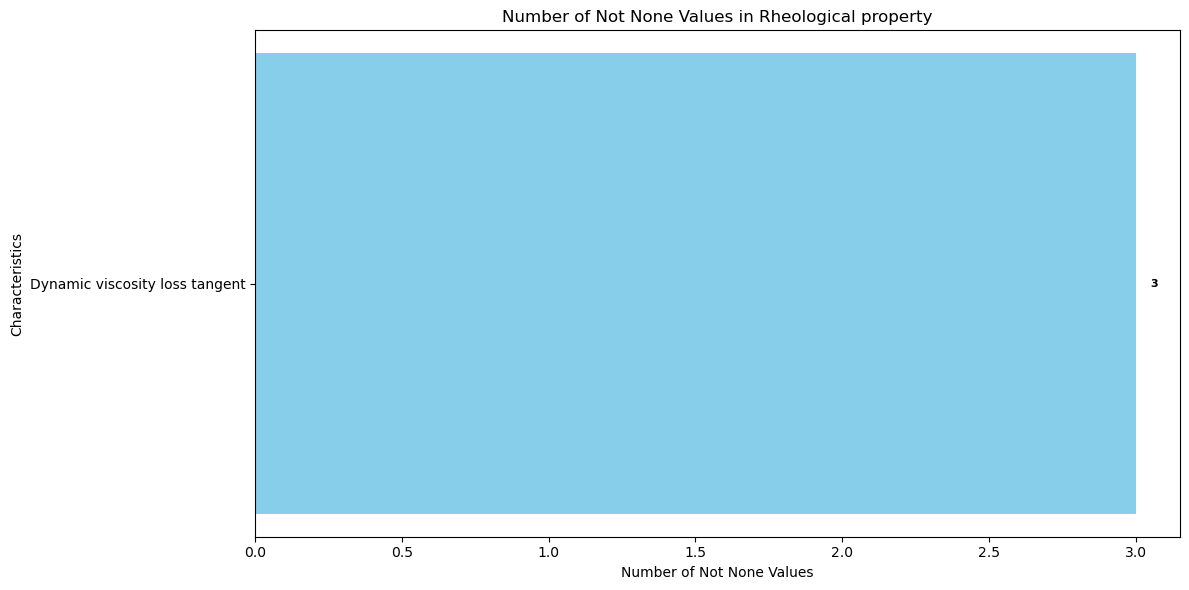

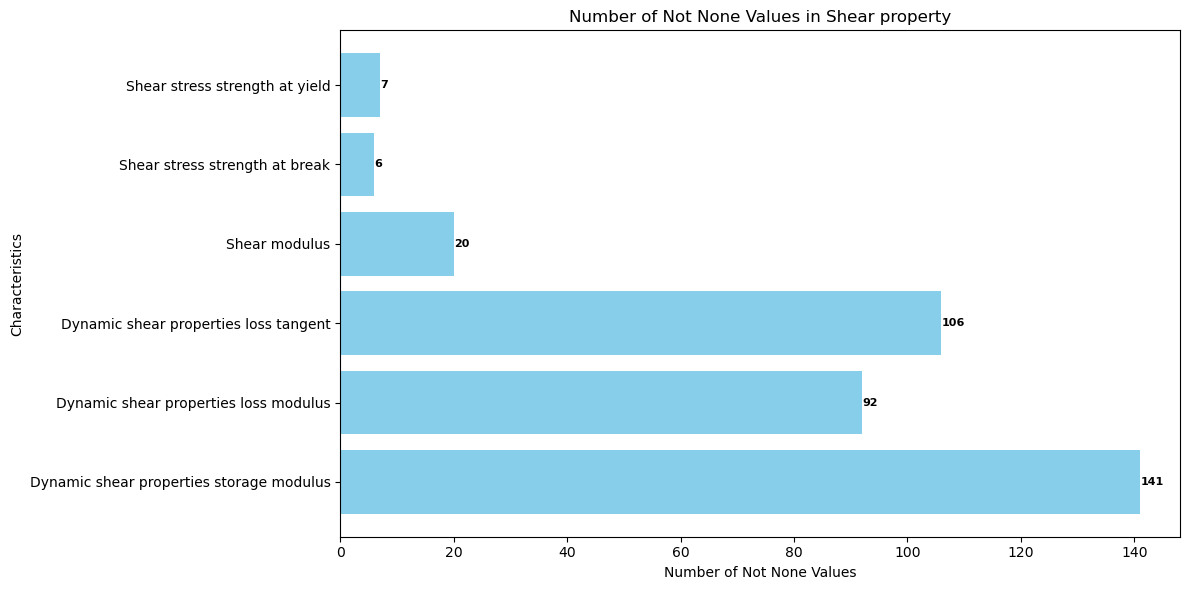

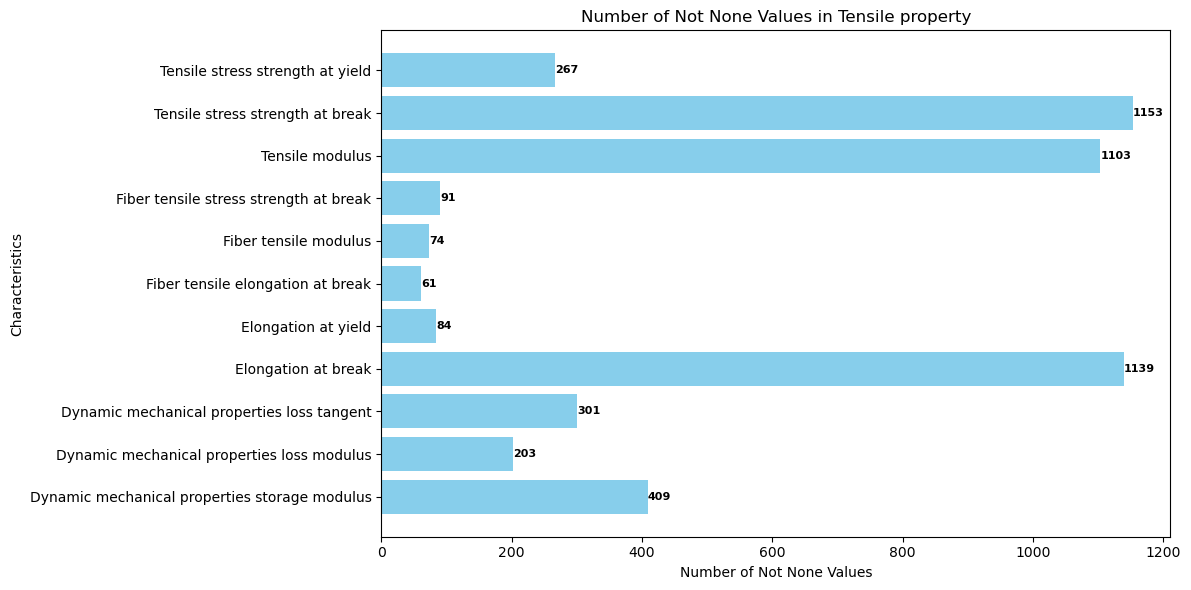

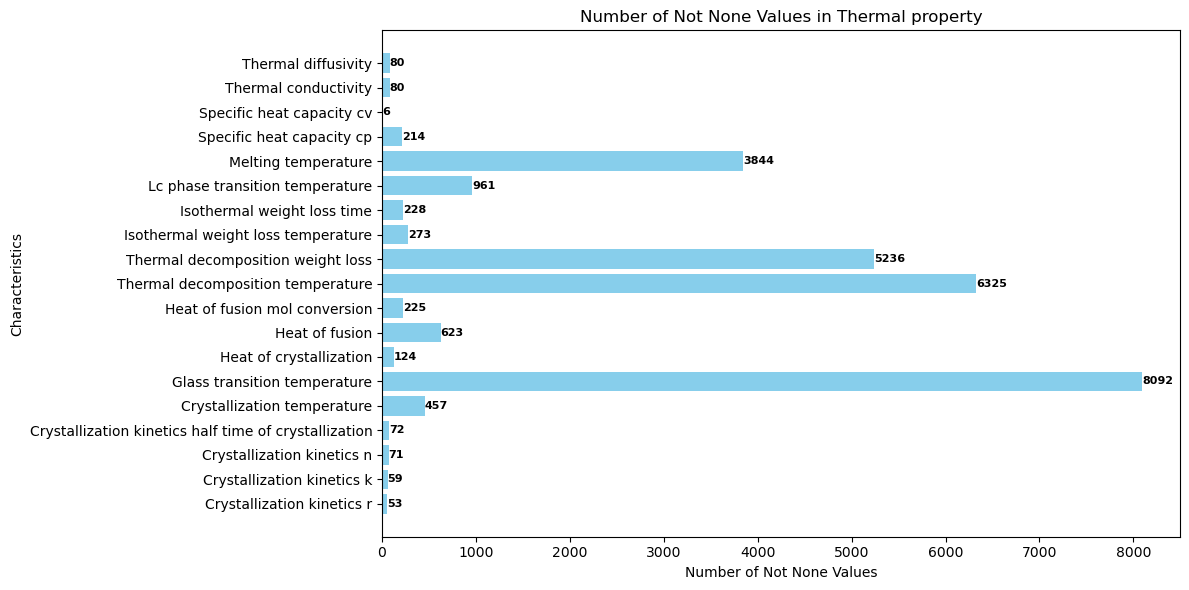

In [7]:
import matplotlib.pyplot as plt
import numpy as np

categs = list(data.keys())
vals = list(data.values())

for u in range(len(vals)):
    cols_value_median = vals[u]  # Replace this with the actual data
    cols_value_median_with_suffix = [c + "_value_median" for c in cols_value_median]

    # Check if all columns exist in the DataFrame
    existing_cols = [col for col in cols_value_median_with_suffix if col in poly_data.columns]

    # Skip plotting if any columns are missing
    if not existing_cols:
        print(f"Skipping {categs[u]} as it contains columns not present in DataFrame")
        continue

    subset_df = poly_data[existing_cols]

    # Count non-null values in each column
    not_none_counts = subset_df.notnull().sum()

    # Plotting the horizontal bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.barh(cols_value_median, not_none_counts.values, color='skyblue')

    # Adding colored numbers inside each bar
    for bar, value in zip(bars, not_none_counts.values):
        xval = bar.get_width()
        ax.text(xval + 0.05, bar.get_y() + bar.get_height() / 2, f'{round(value, 2)}',
                ha='left', va='center', color='black', fontsize=8, fontweight='bold')

    # Adding labels and title
    plt.xlabel('Number of Not None Values')
    plt.ylabel('Characteristics')
    plt.title(f'Number of Not None Values in {categs[u]}')

    # Show the plot
    plt.tight_layout()
    plt.savefig(f'{categs[u]}_bar_horizontal.png')
    plt.show()


Now that all the plots complete with no error on missing data or SMILES we need to work on the sizing and spacing first all the plots are different sizes and as data scientists we like beautiful things so lets work on that next. The main cause for the plots having differing sizes is the very long category labels in some categories. 

To ensure that all plots have a uniform appearance despite the varying lengths of category names, we can adjust several aspects of your plots. One approach is to set a fixed size for the figures and adjust the font size and bar height dynamically based on the number of categories. However, for very long category names, we will consider wrapping the text to ensure that it fits neatly within the designated area. 

Here's how to do this:
* Fixed Figure Size: We already set a fixed figure size with `figsize=(12, 6)`, which is a good start.
* Dynamic Font Size and Bar Height: Adjust the font size and bar height dynamically based on the number of categories to ensure readability and consistency across plots.
* Text Wrapping: For very long category names, we will wrap the text to ensure it doesn't overflow or make the plot look cluttered.

1. import textwrap  # Import textwrap for wrapping text

# Wrap text for long category names
`wrapped_categs = ['\n'.join(textwrap.wrap(c, 20)) for c in cols_value_median]`

and then implementing this in the bars definition 

`bars = ax.barh(wrapped_categs, not_none_counts.values, color='skyblue')`

# Dynamically adjust font size based on the number of categories
`font_size = max(min(20 / np.sqrt(len(cols_value_median)), 12), 8)  # Example dynamic calculation`

then modifying the ax.txt call to use the dynamically adjusted font size: <br><br>
`ax.text(xval + 0.05, bar.get_y() + bar.get_height() / 2, f'{round(value, 2)}',
        ha='left', va='center', color='black', fontsize=font_size, fontweight='bold')`



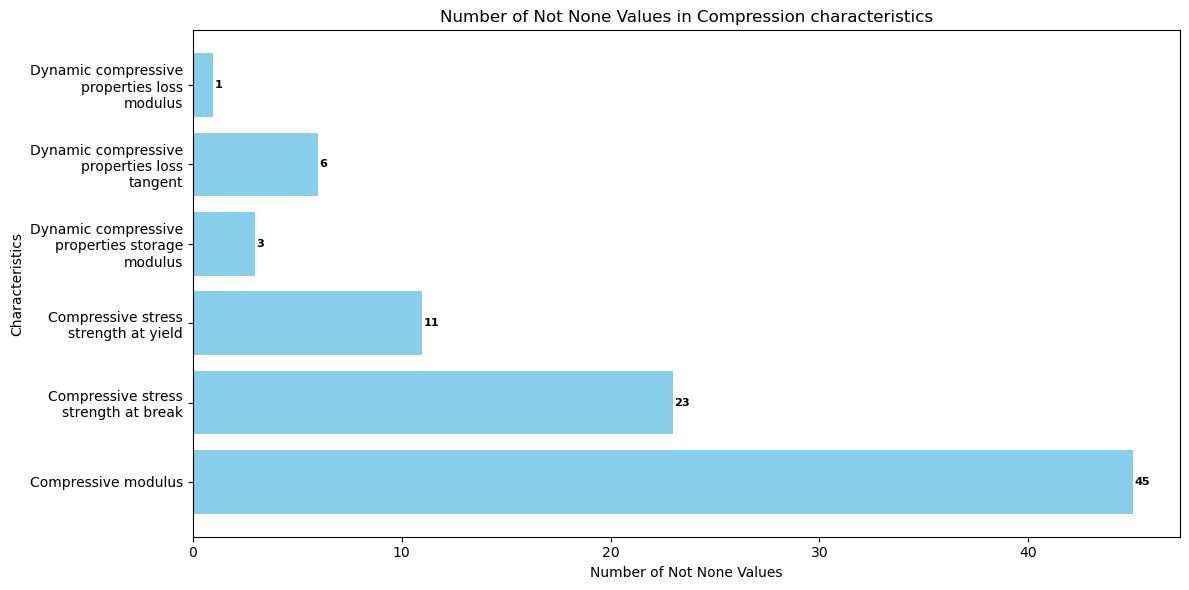

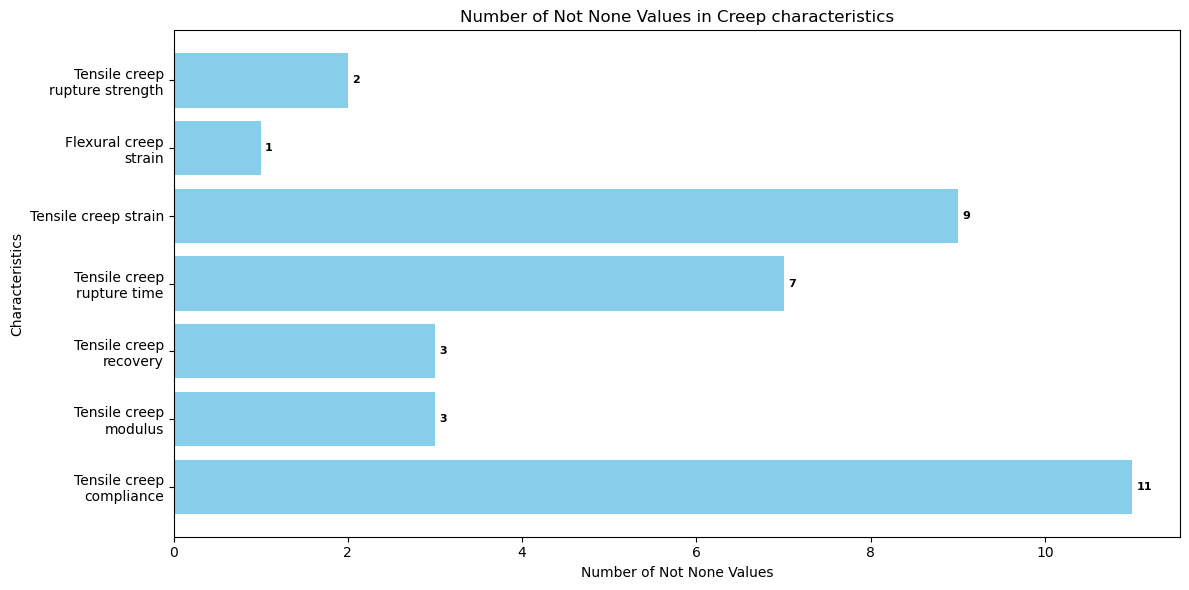

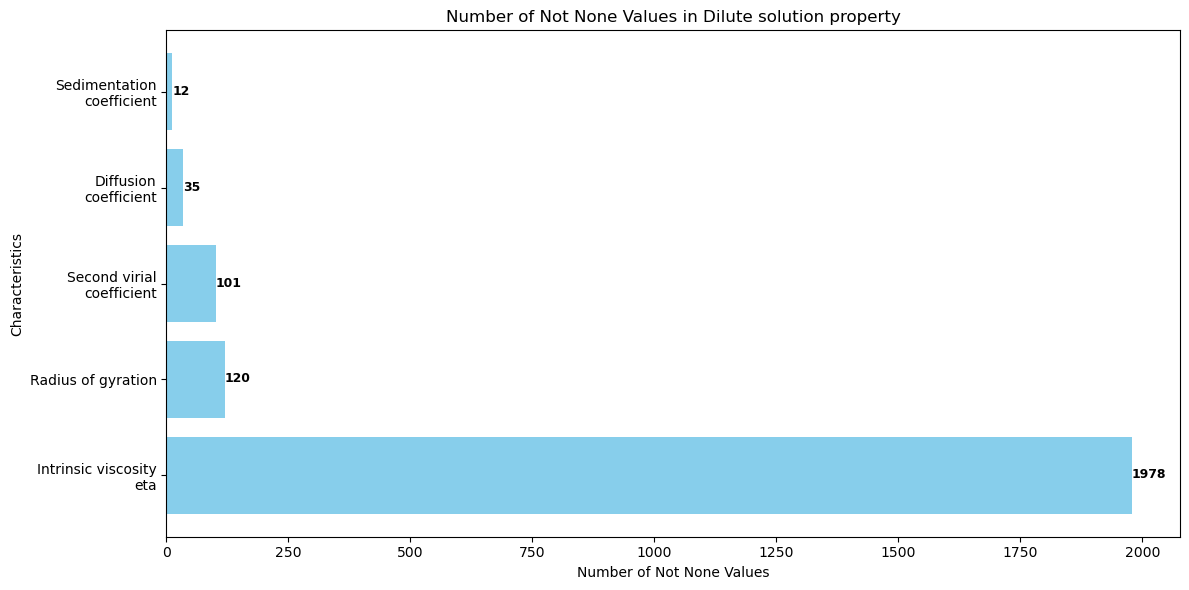

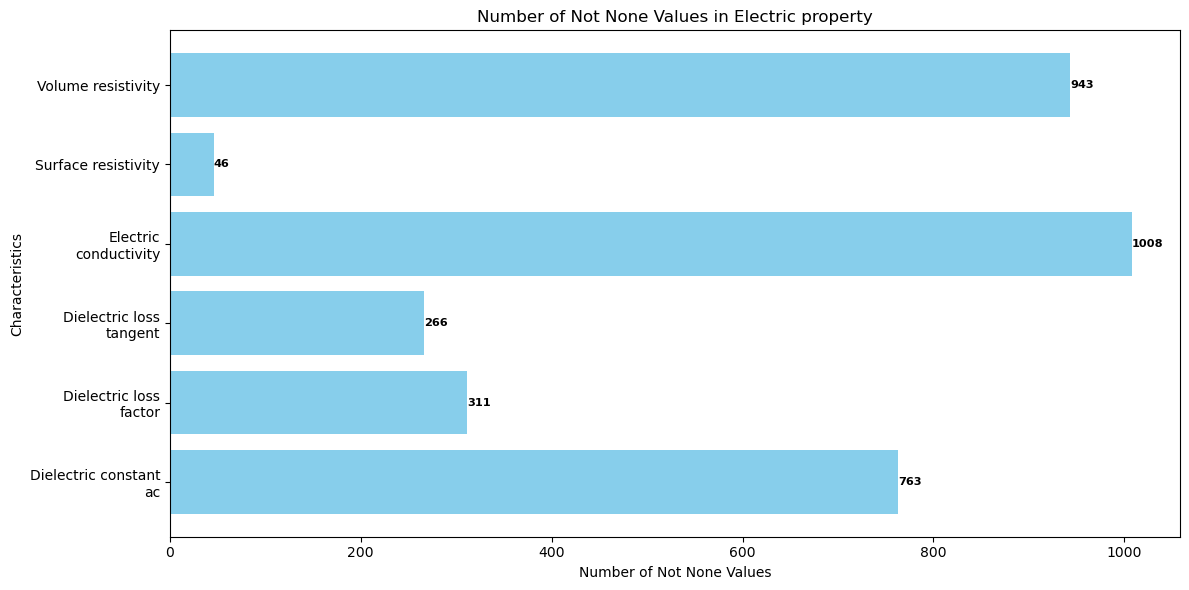

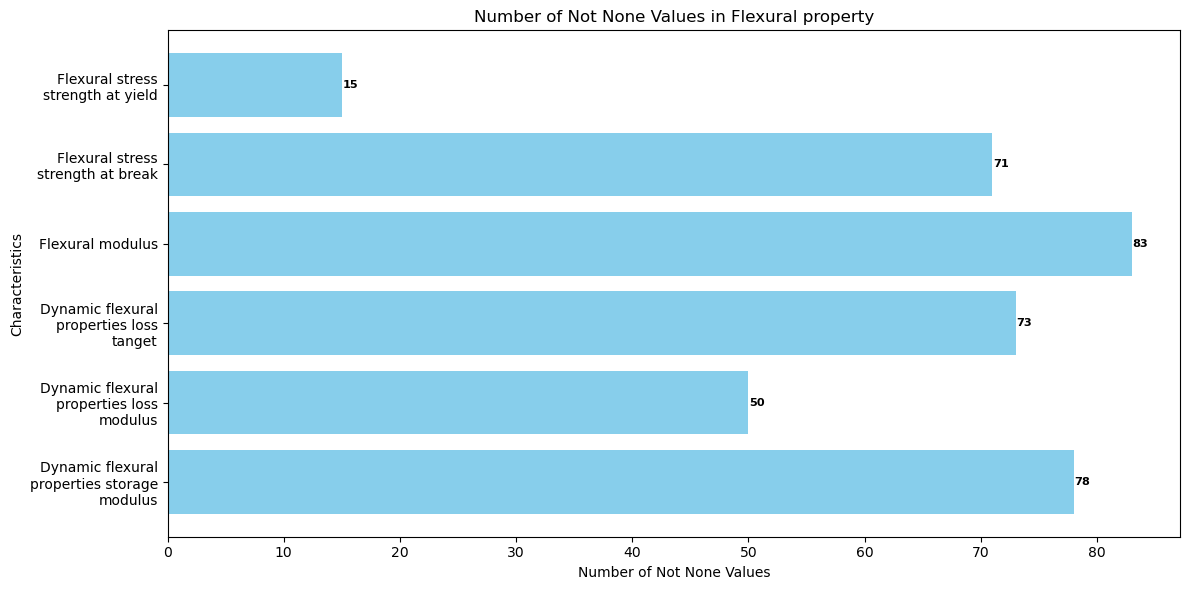

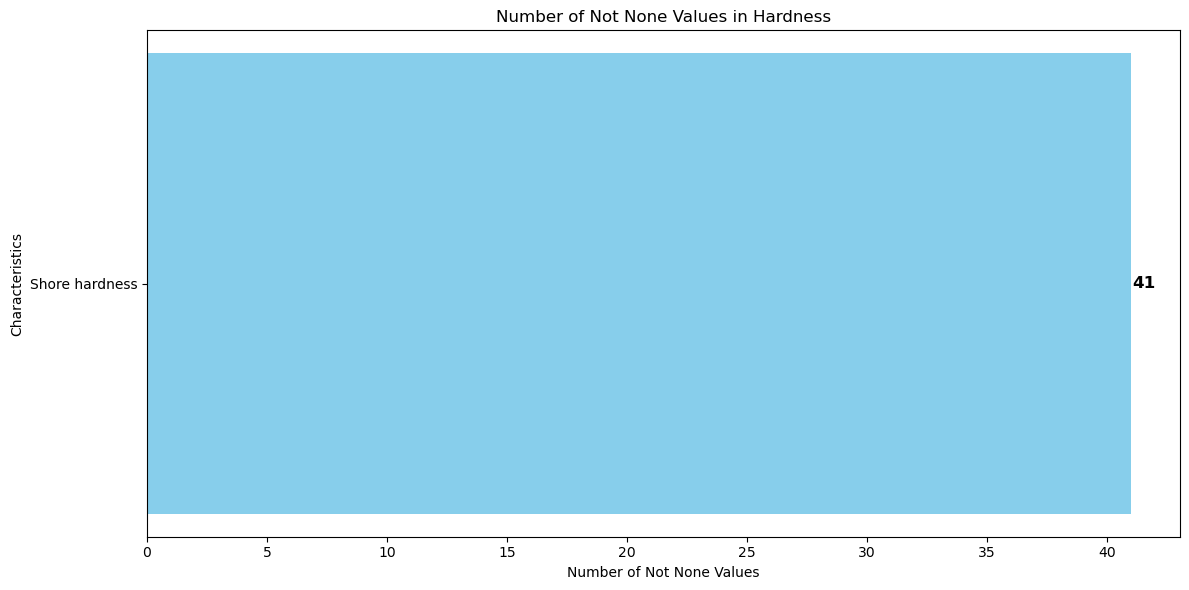

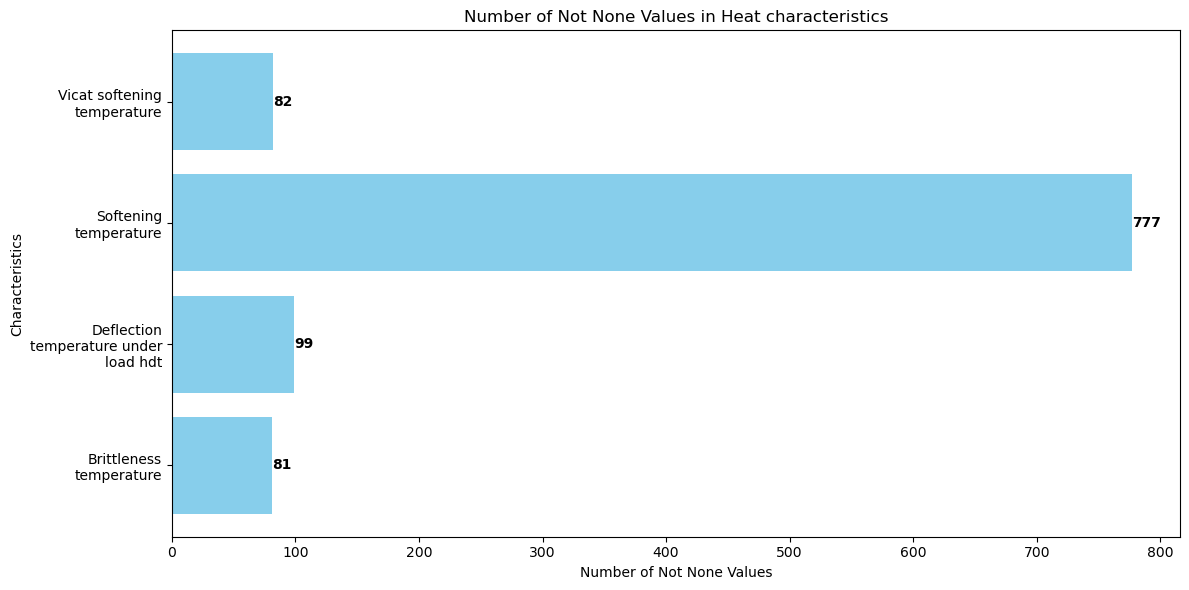

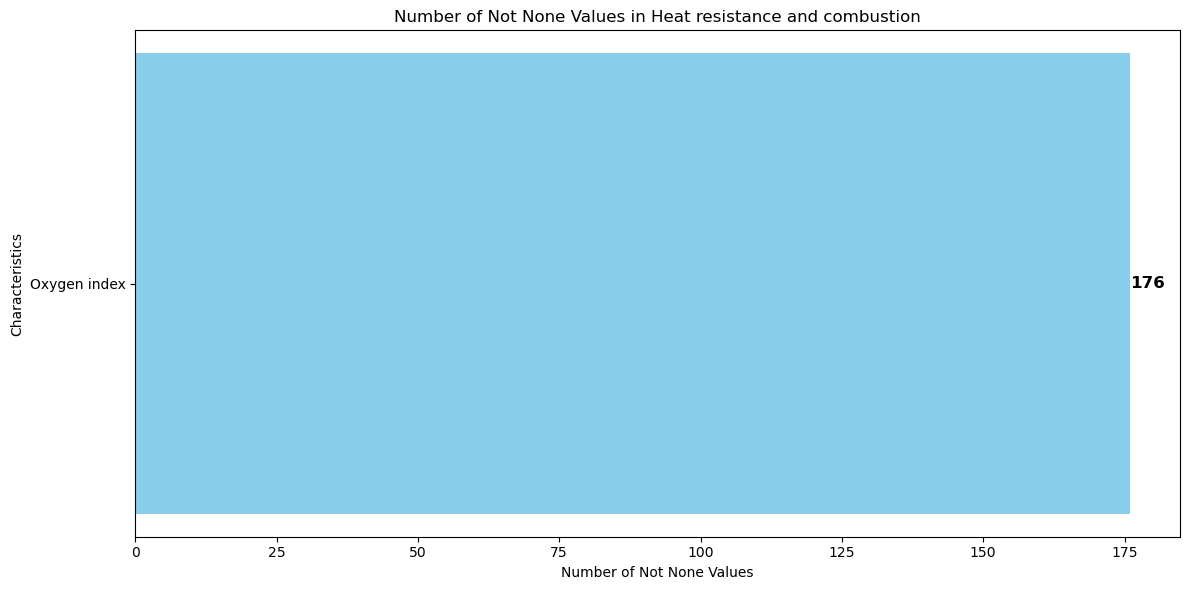

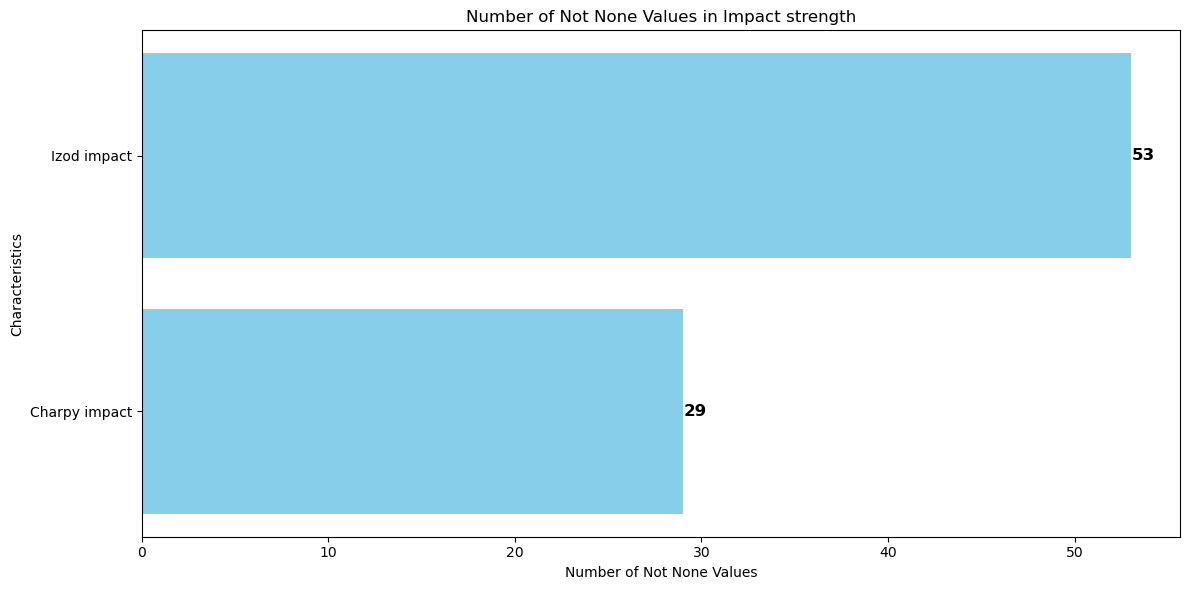

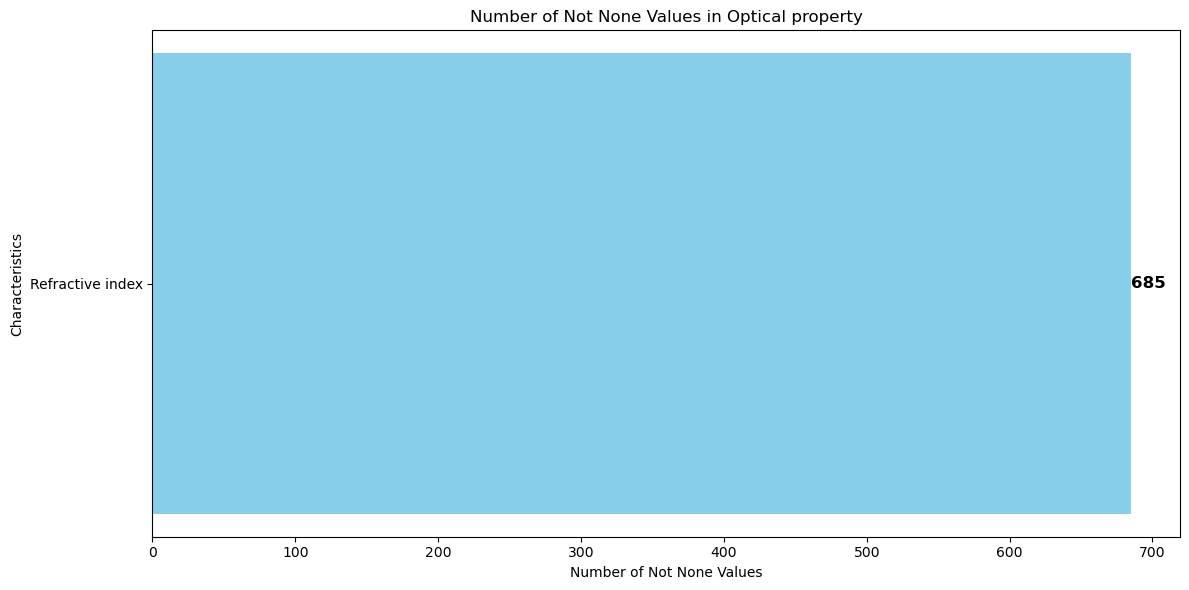

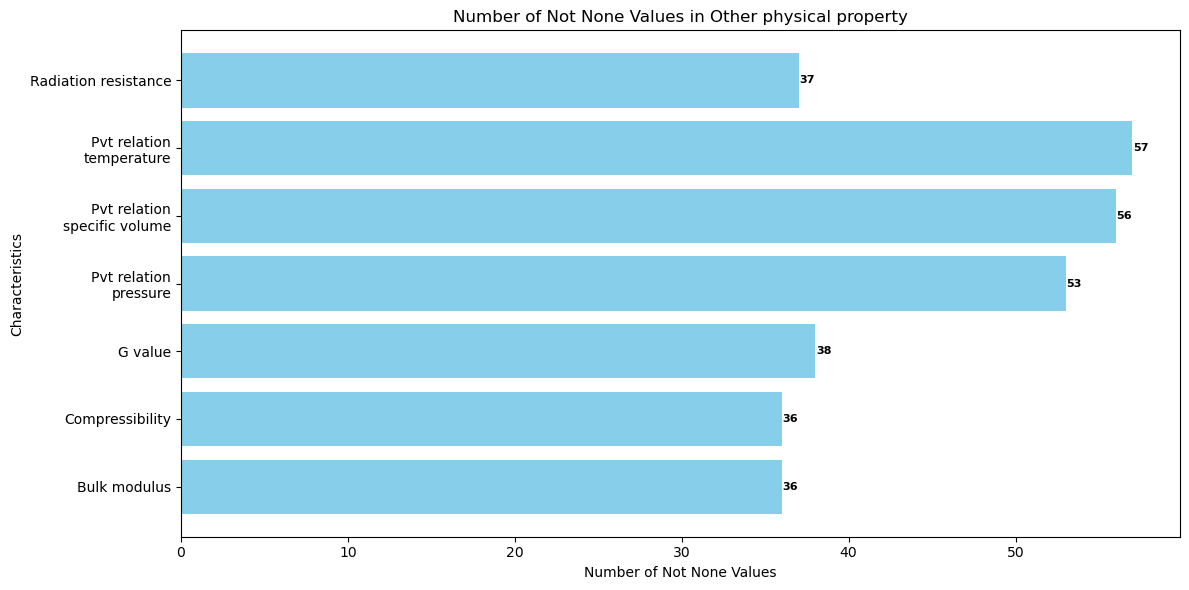

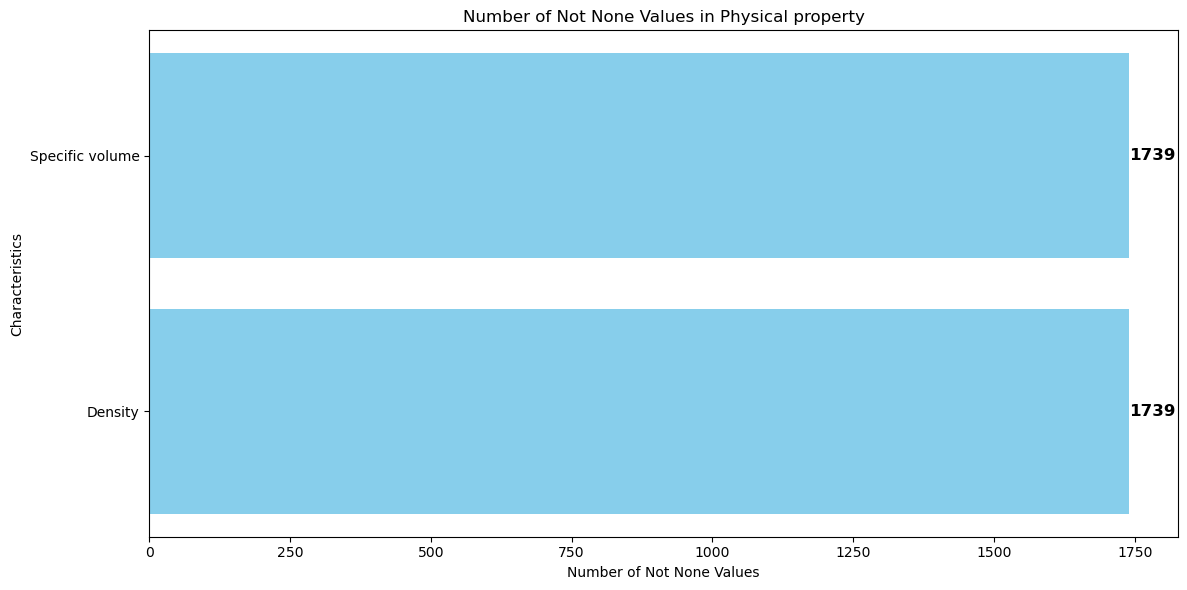

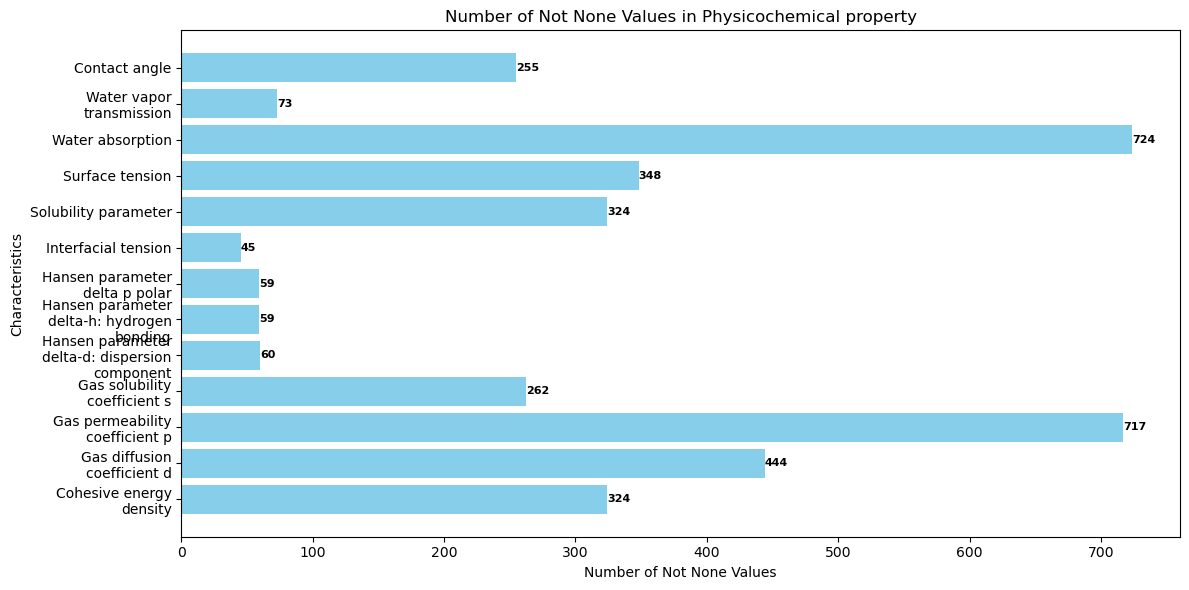

Skipping Polymer Information as it contains columns not present in DataFrame


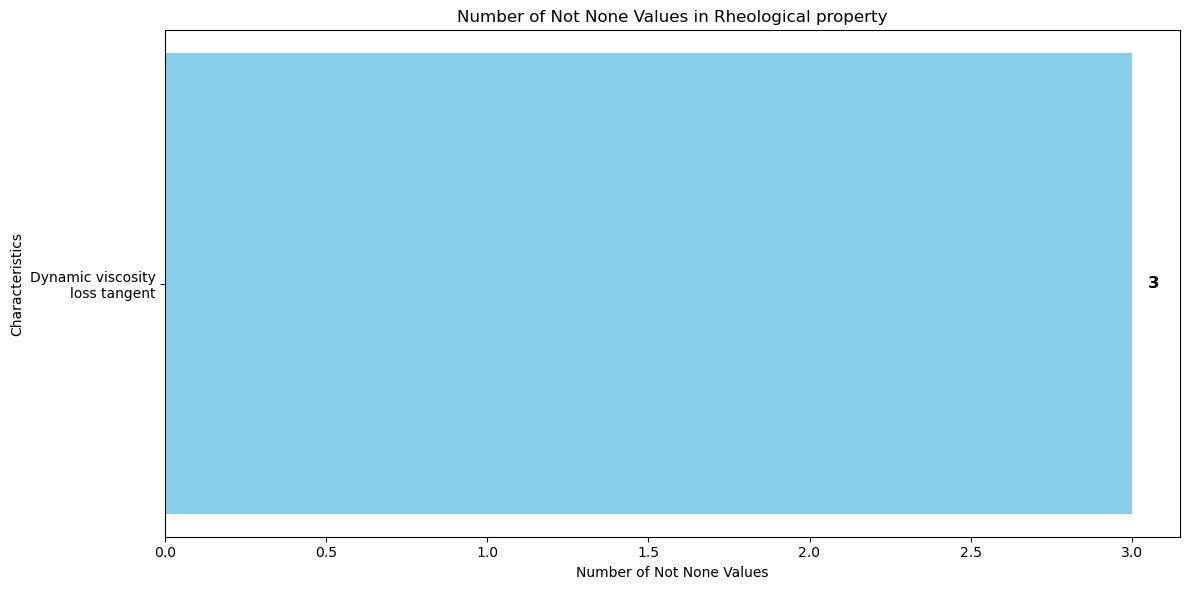

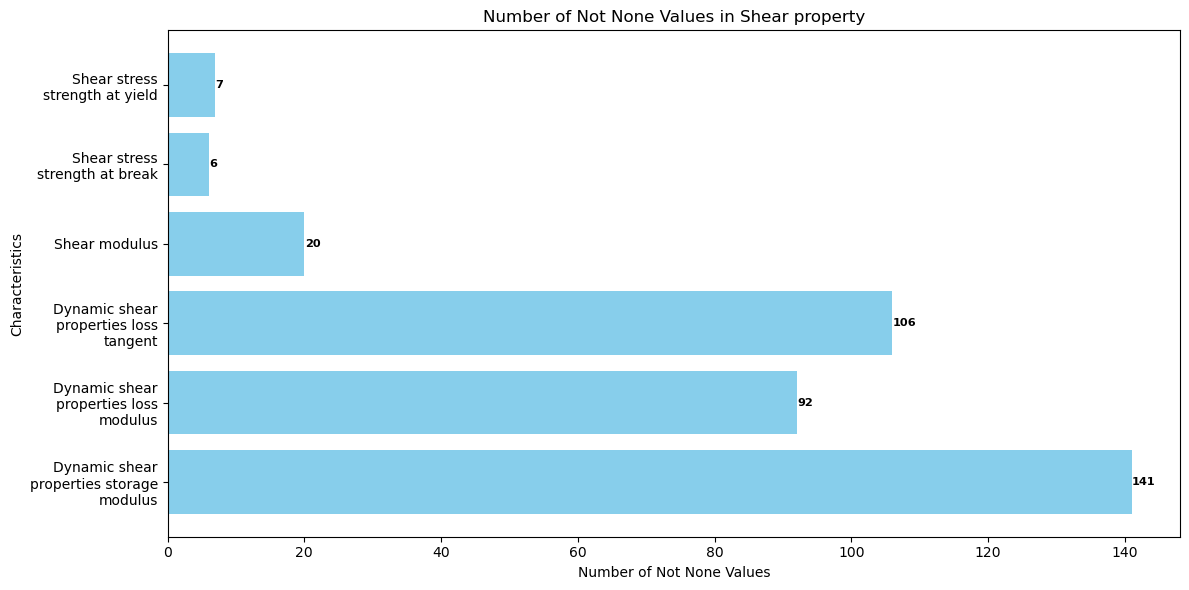

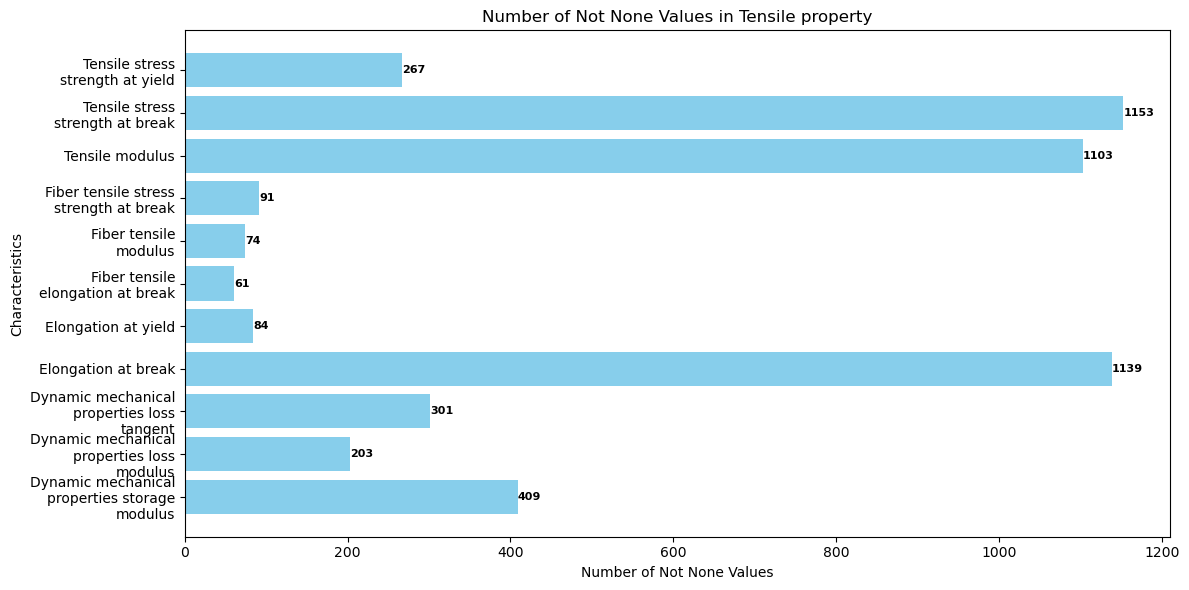

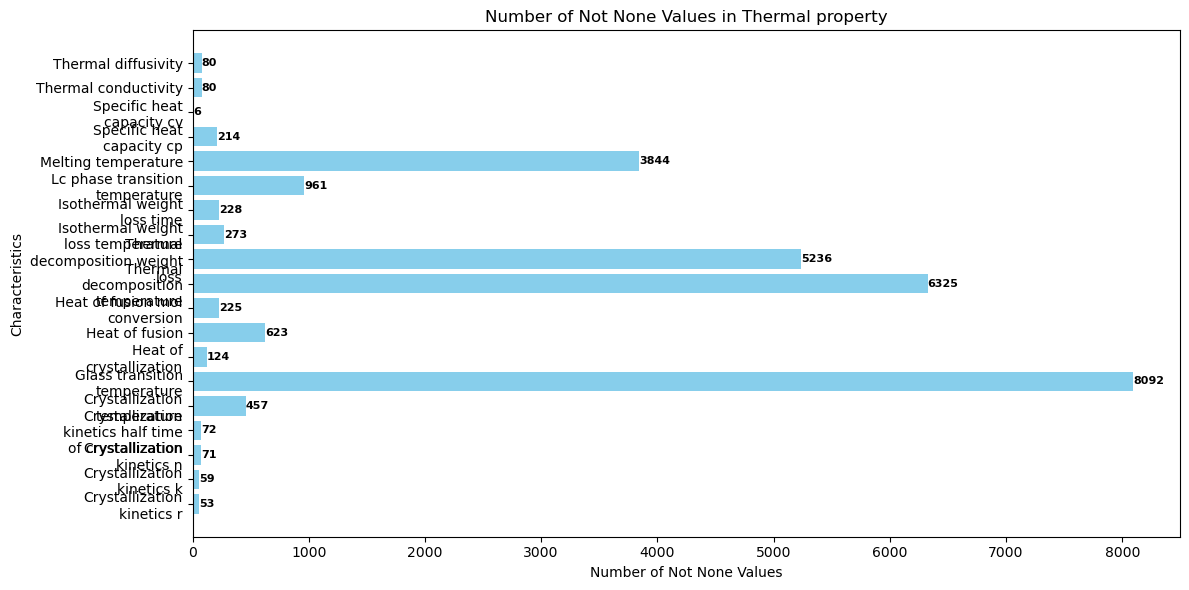

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap  # Import textwrap for wrapping text

categs = list(data.keys())
vals = list(data.values())

for u in range(len(vals)):
    cols_value_median = vals[u]
    cols_value_median_with_suffix = [c + "_value_median" for c in cols_value_median]

    # Check if all columns exist in the DataFrame
    existing_cols = [col for col in cols_value_median_with_suffix if col in poly_data.columns]

    # Skip plotting if any columns are missing
    if not existing_cols:
        print(f"Skipping {categs[u]} as it contains columns not present in DataFrame")
        continue

    subset_df = poly_data[existing_cols]

    # Count non-null values in each column
    not_none_counts = subset_df.notnull().sum()

    # Wrap text for long category names
    wrapped_categs = ['\n'.join(textwrap.wrap(c, 20)) for c in cols_value_median]

    # Plotting the horizontal bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.barh(wrapped_categs, not_none_counts.values, color='skyblue')

    # Dynamically adjust font size based on the number of categories
    font_size = max(min(20 / np.sqrt(len(cols_value_median)), 12), 8)  # Example dynamic calculation

    # Adding colored numbers inside each bar
    for bar, value in zip(bars, not_none_counts.values):
        xval = bar.get_width()
        ax.text(xval + 0.05, bar.get_y() + bar.get_height() / 2, f'{round(value, 2)}',
                ha='left', va='center', color='black', fontsize=font_size, fontweight='bold')

    # Adding labels and title
    plt.xlabel('Number of Not None Values')
    plt.ylabel('Characteristics')
    plt.title(f'Number of Not None Values in {categs[u]}')

    # Show the plot
    plt.tight_layout()
    plt.savefig(f'{categs[u]}_bar_horizontal.png')
    plt.show()


The modifications go a long way to mitigating the problem however we still see that Some very long names where there are many categories the label bumps into the label below. So we need to fix that. 

To increase the space between bars in a horizontal bar chart to accommodate long labels without them bumping into each other, especially when there are many categories, we can adjust the height of each bar dynamically based on the number of categories. This will make the chart taller as the number of categories increases, giving more space for each label.

Here's how we can modify the code to achieve this:

* Calculate Dynamic Figure Height: Instead of using a fixed figure size, calculate the height of the figure dynamically based on the number of categories. This ensures that each category has enough space.
* Adjust Bar Height: Optionally, we can adjust the height of the bars themselves, but in the case of barh (horizontal bar chart) in Matplotlib, the spacing is more effectively managed by controlling the figure height and letting Matplotlib automatically adjust the spacing.
* Use Tight Layout: We are already using `plt.tight_layout()`, which is good practice as it automatically adjusts subplot params so that the subplot(s) fits in to the figure area.

Here's how we can implement dynamic figure height:

**Figure Height Calculation:**
The previous block: Uses a fixed figure height `(fig, ax = plt.subplots(figsize=(12, 6)))`.
Here we will dynamically adjust: Dynamically adjusts the figure height based on the number of categories `(figure_height = max(6, len(wrapped_categs) * 0.7)` and then `fig, ax = plt.subplots(figsize=(12, figure_height)))`.

**Multiplier for Figure Height Calculation:**
The previous block: The figure height is not dynamically calculated; thus, no multiplier is used.
The new method: Uses a multiplier of 0.7 in the dynamic calculation of figure height `(len(wrapped_categs) * 0.7)`.


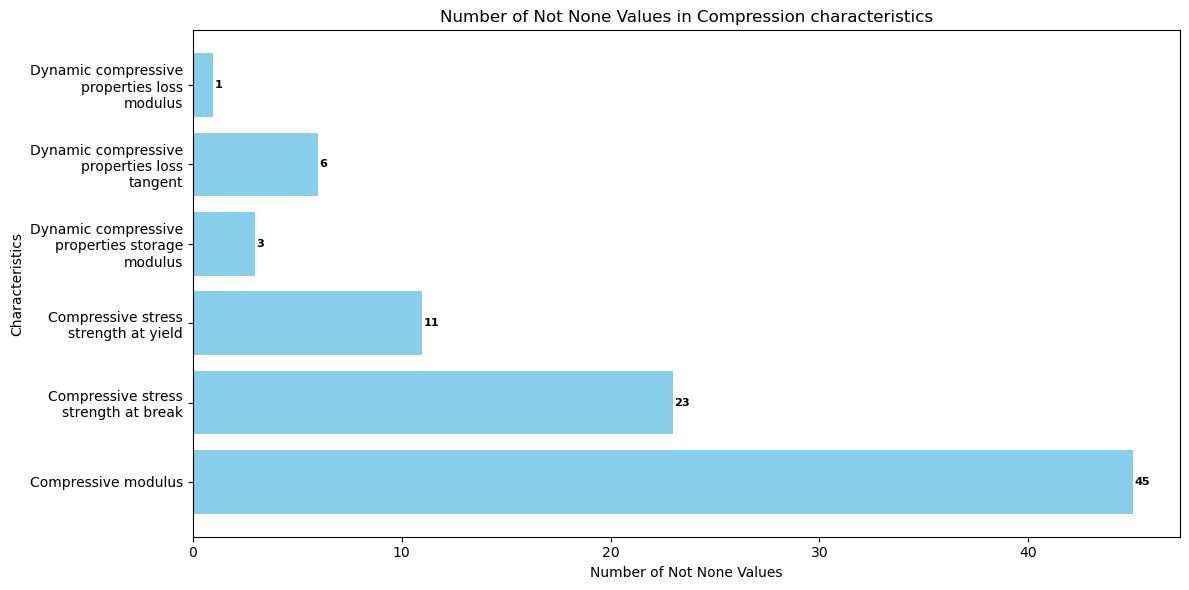

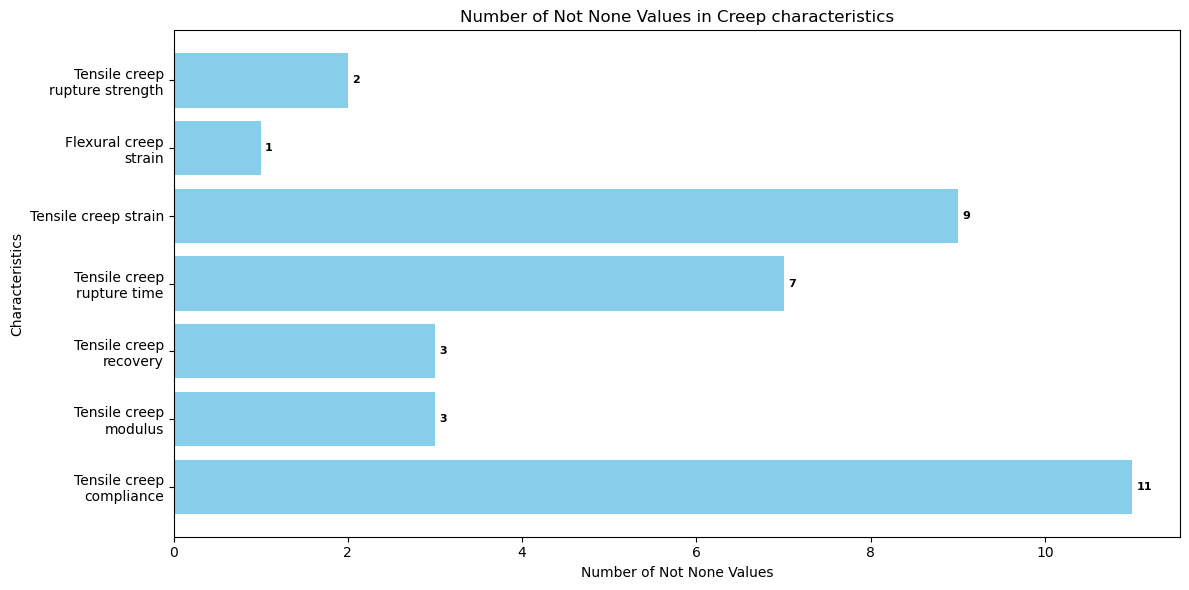

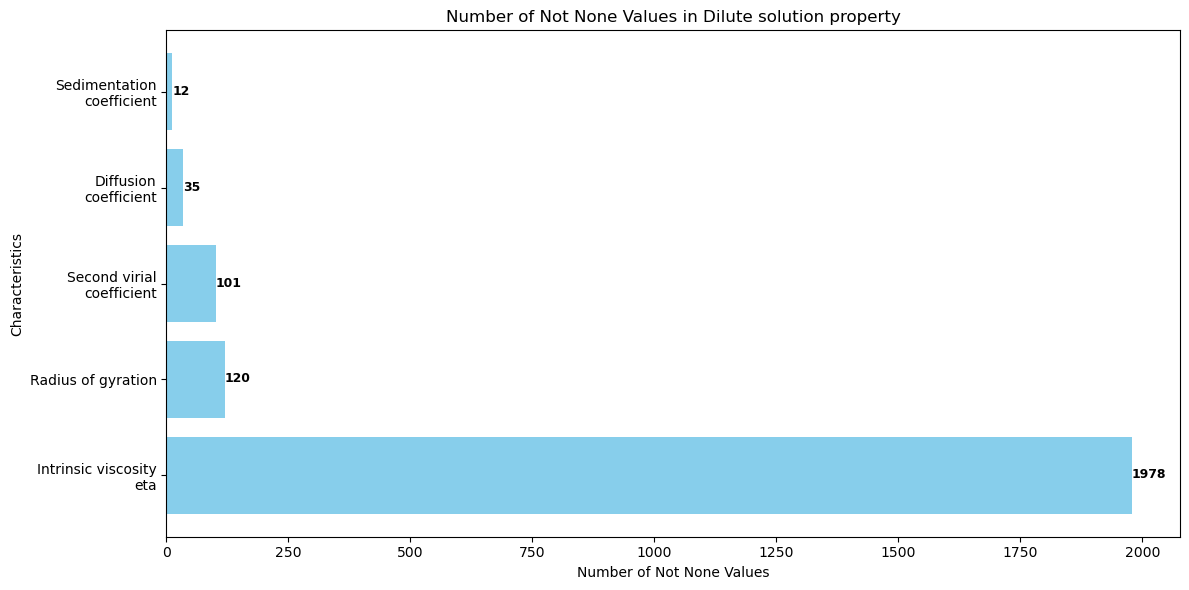

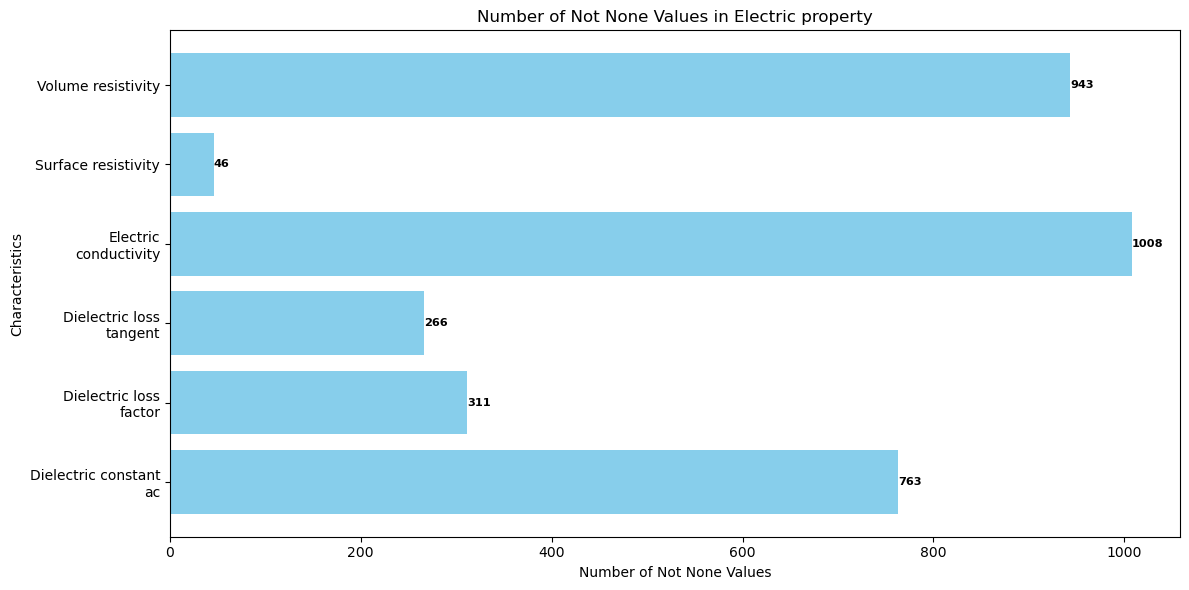

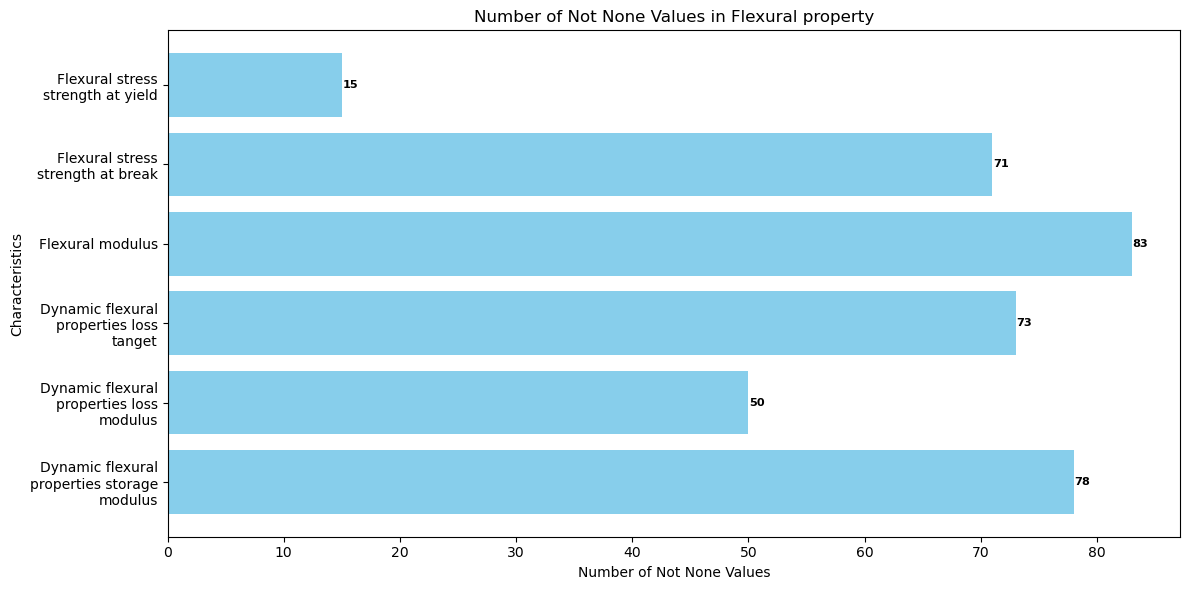

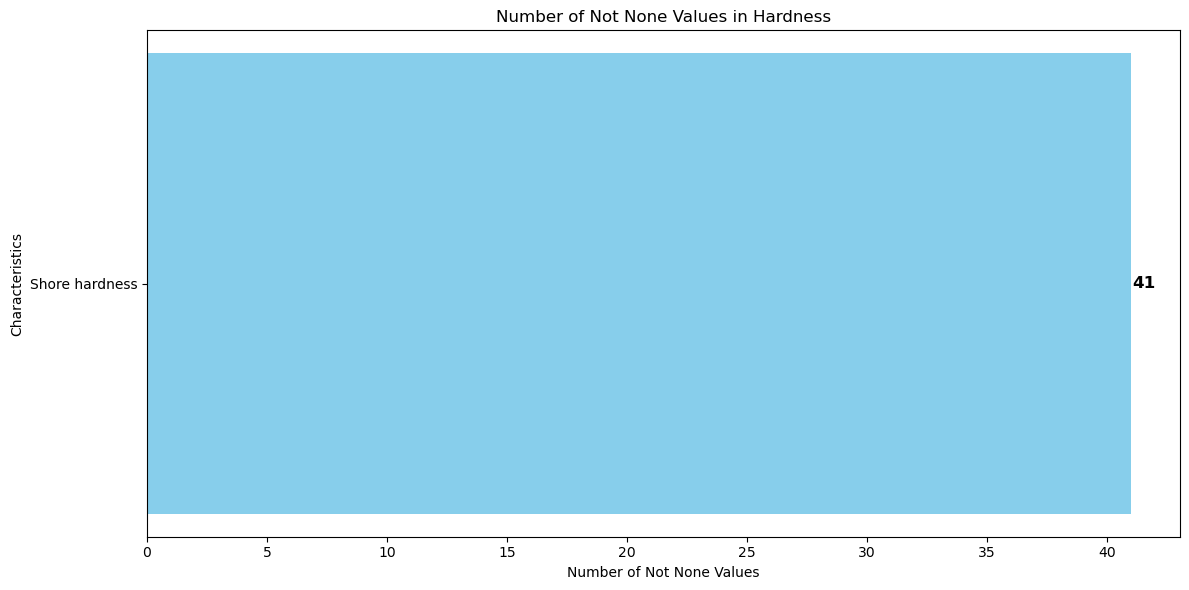

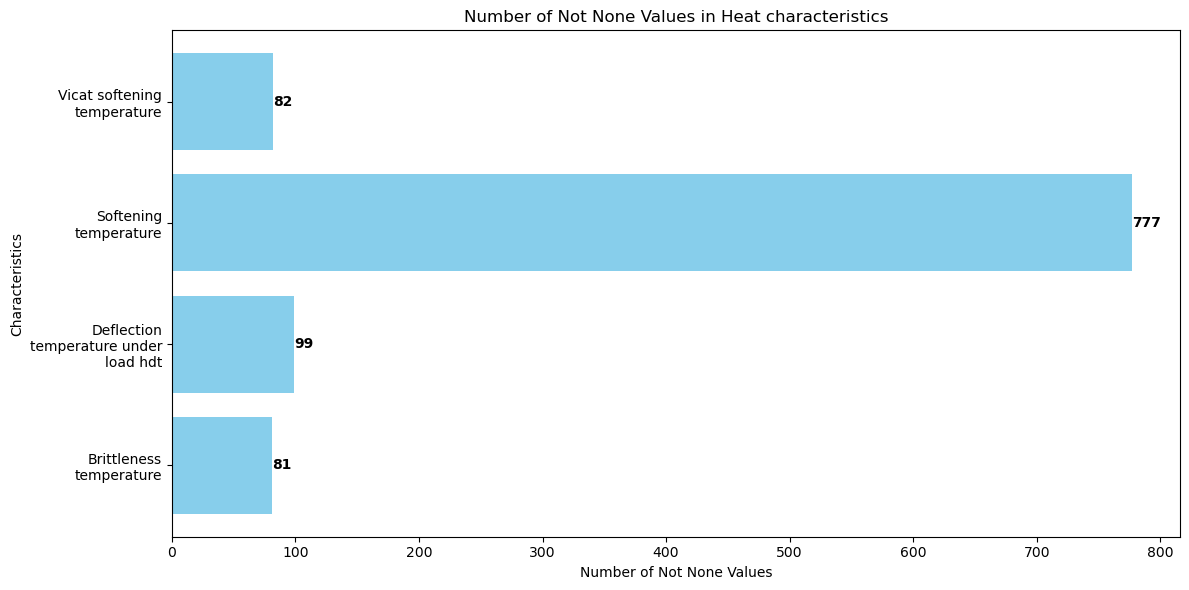

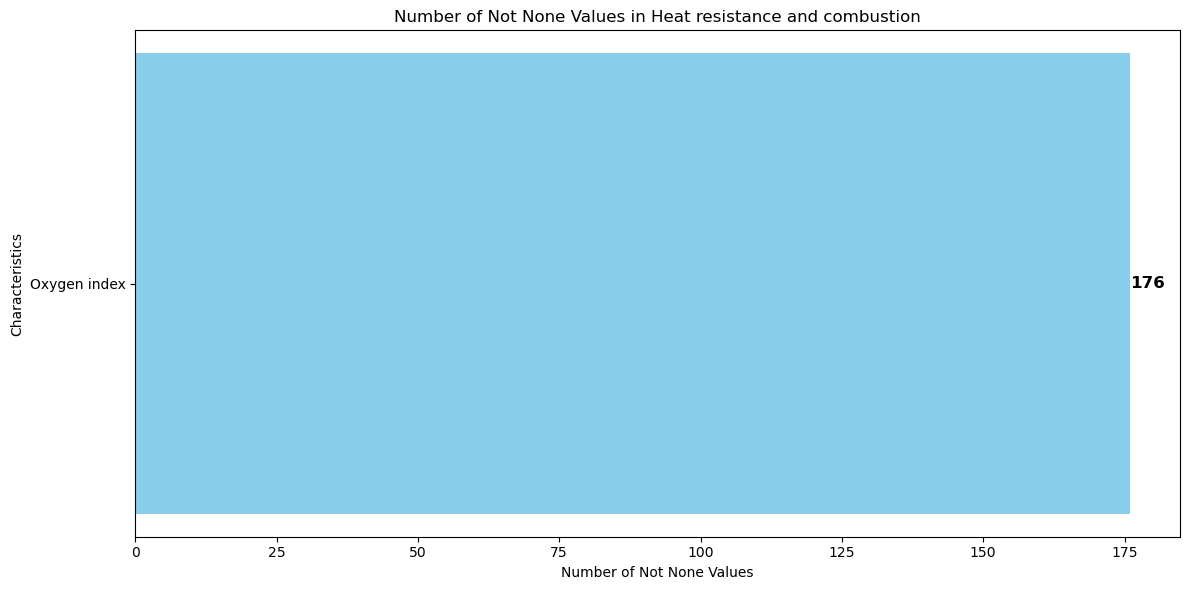

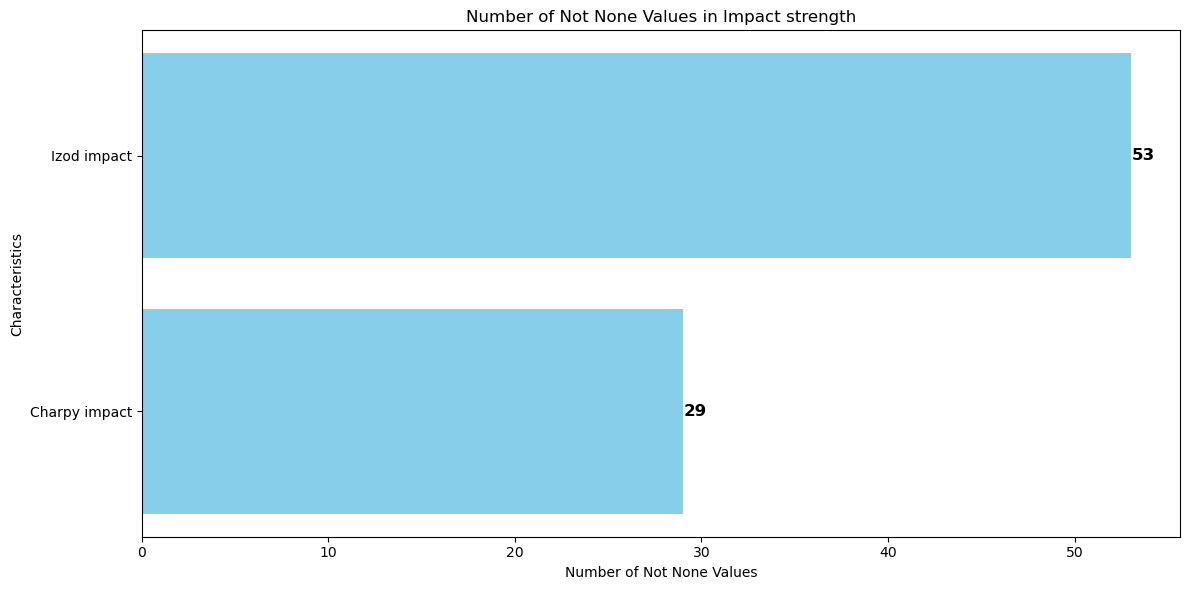

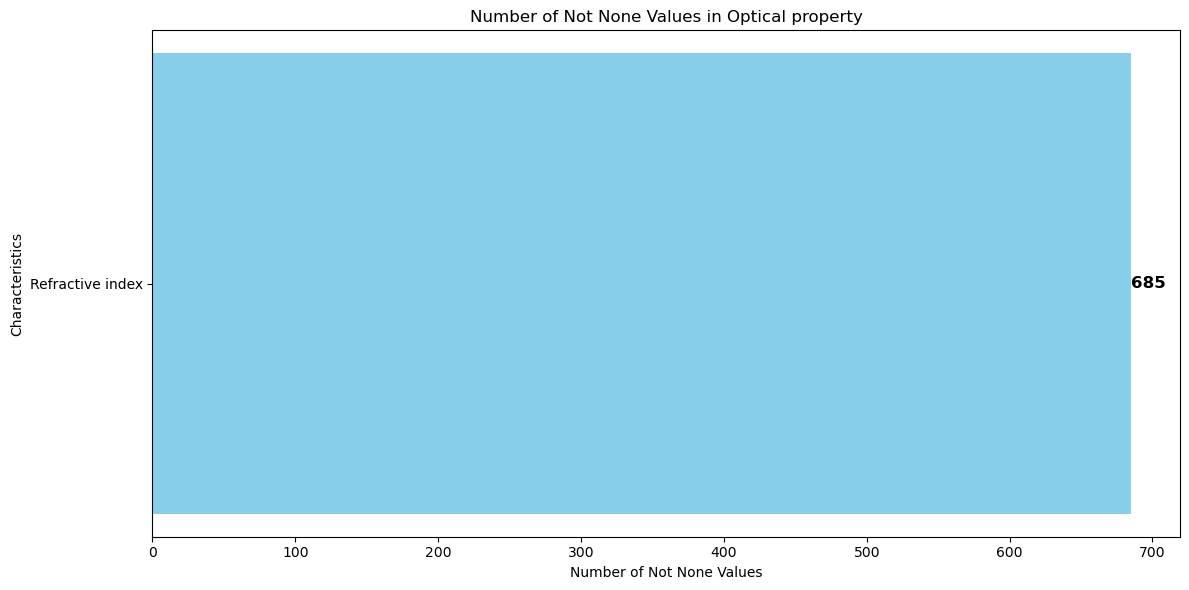

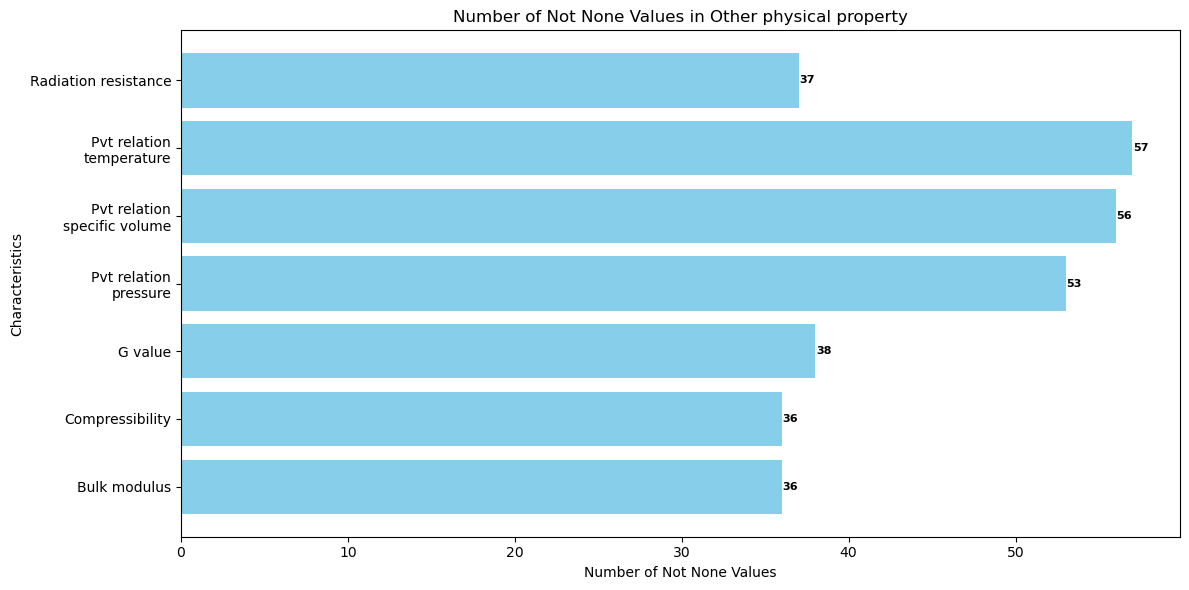

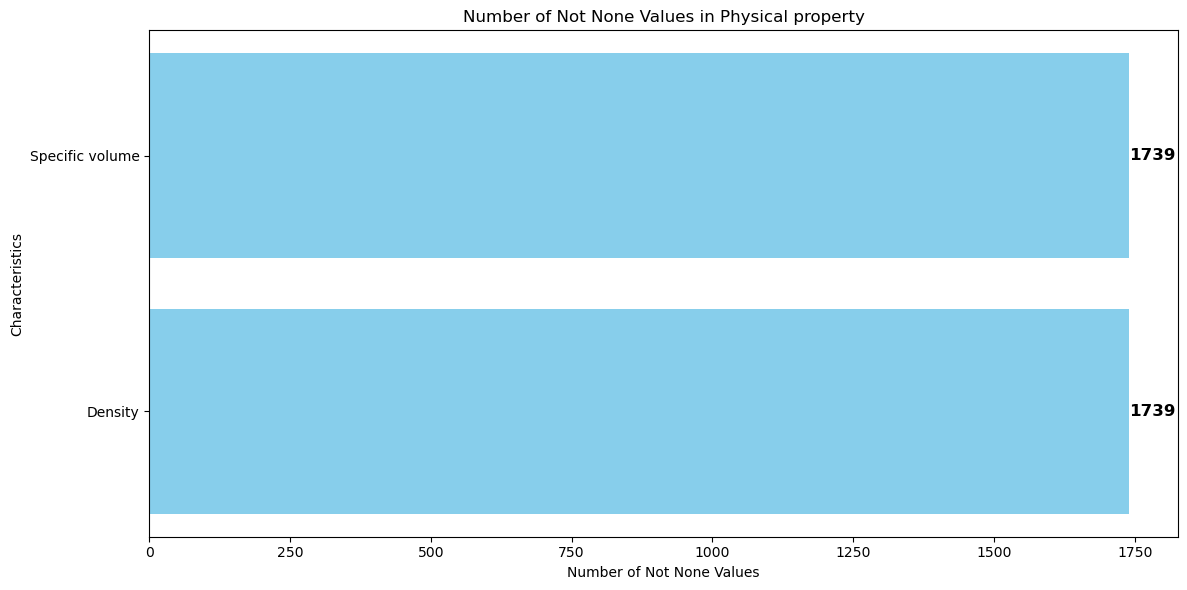

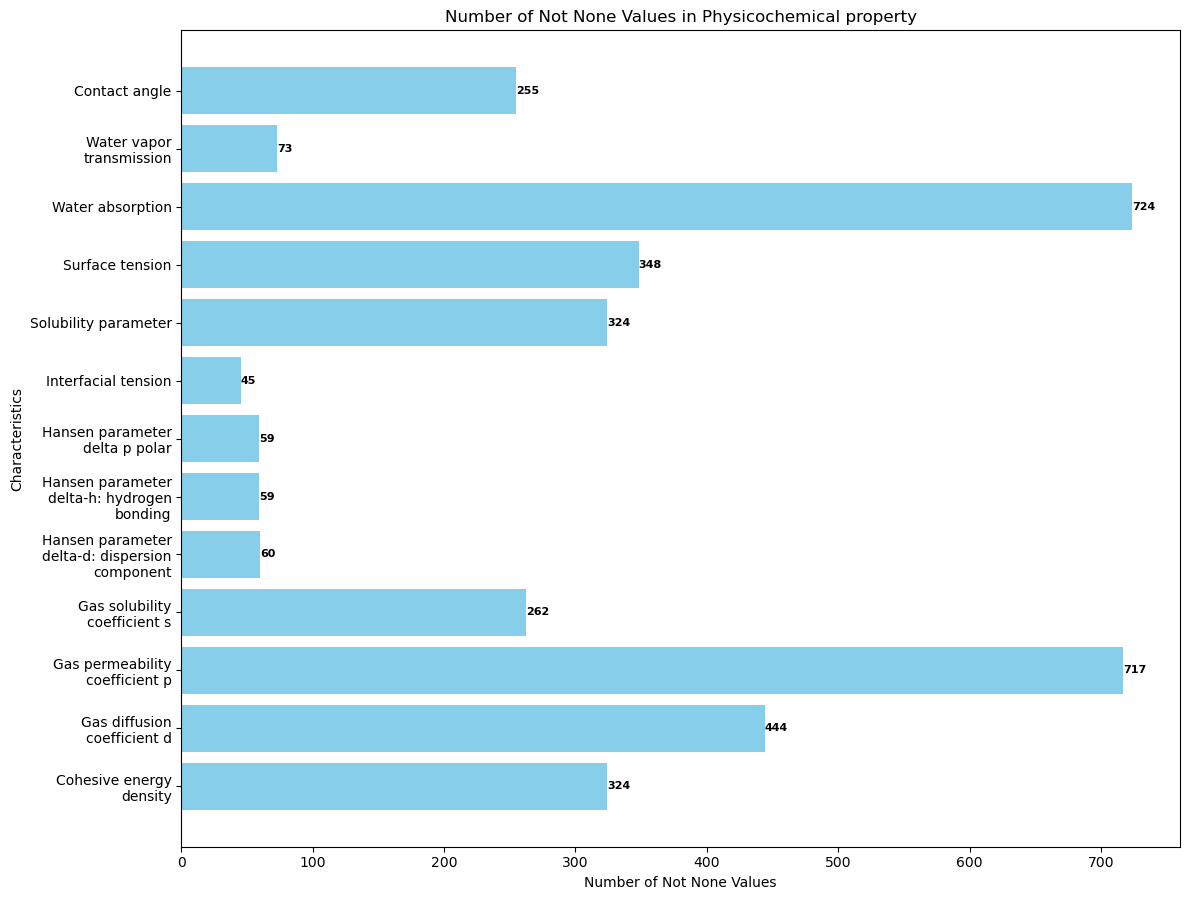

Skipping Polymer Information as it contains columns not present in DataFrame


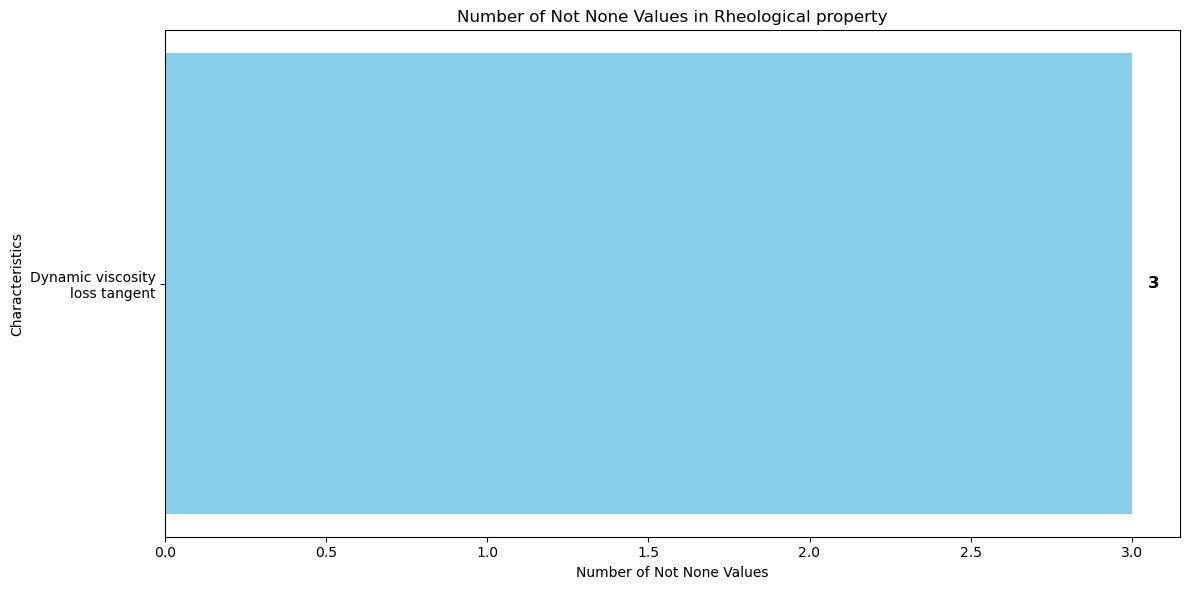

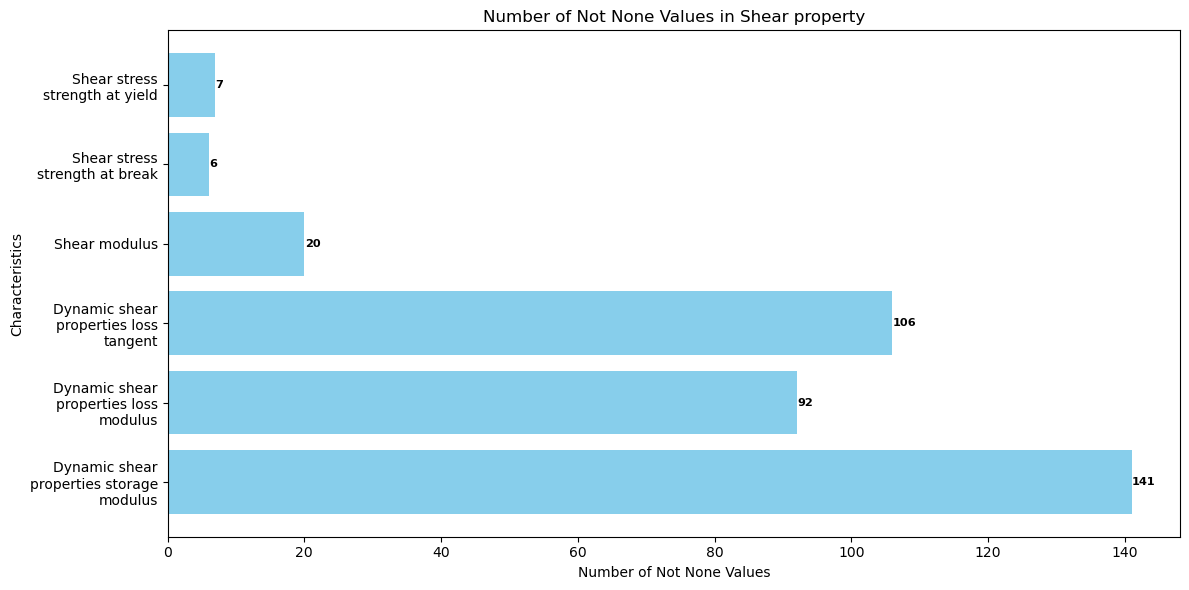

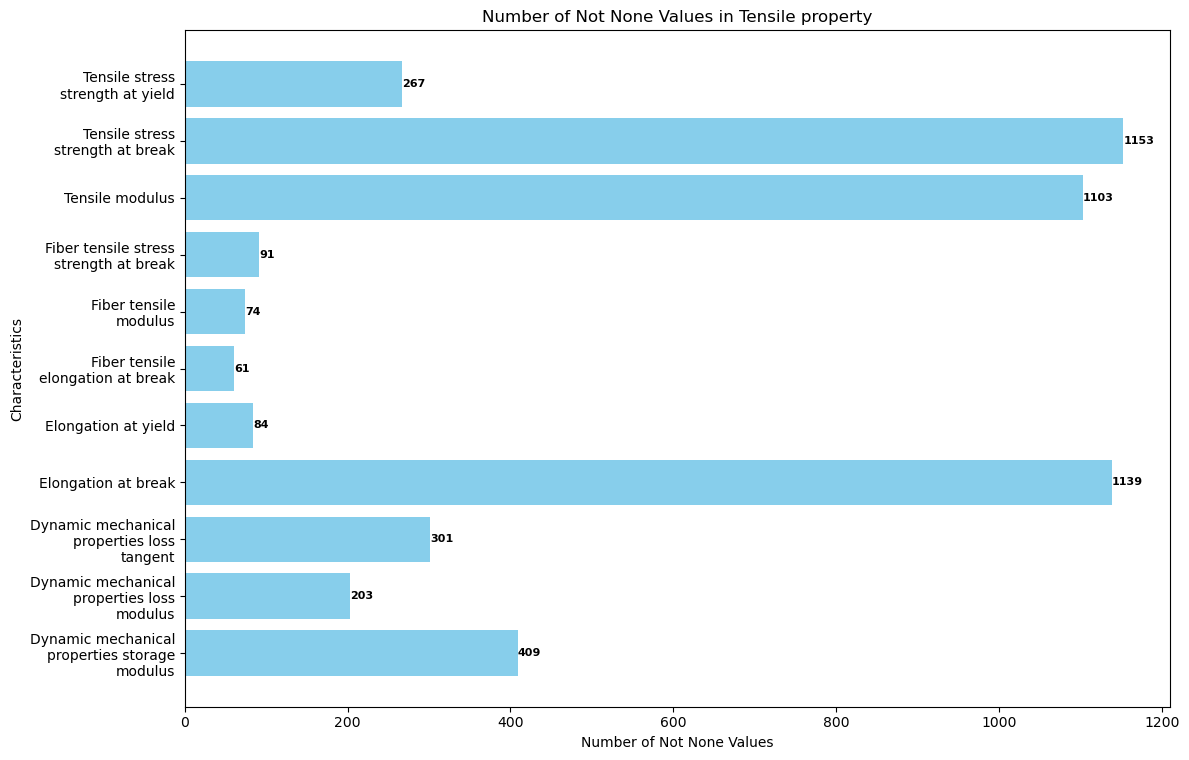

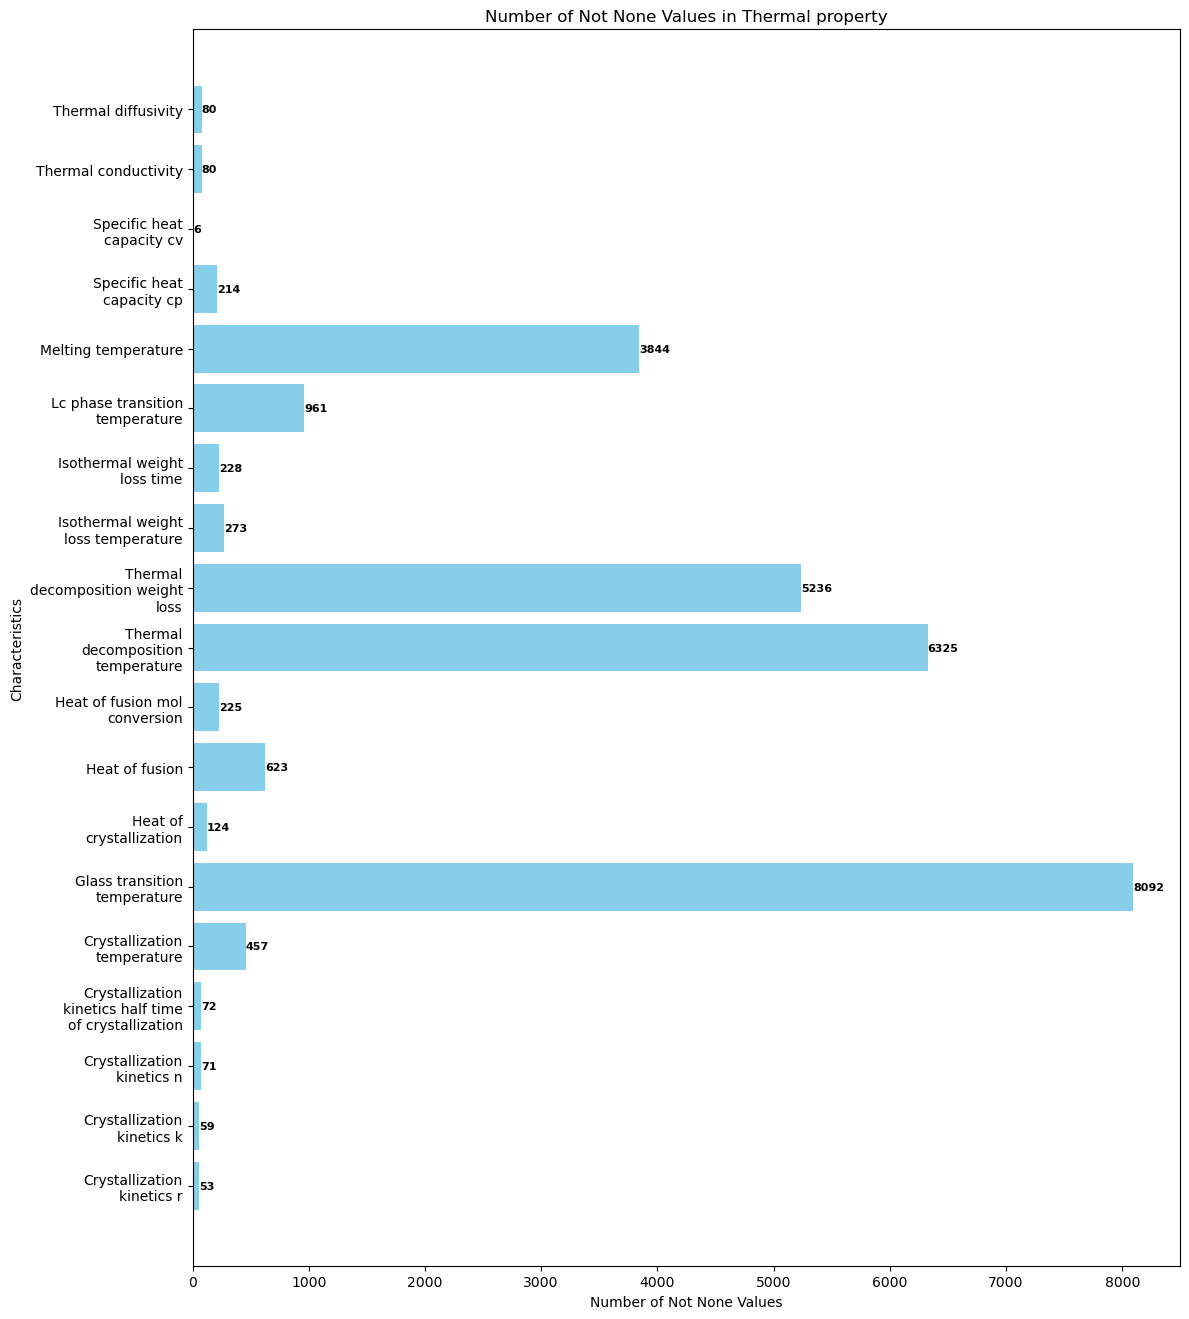

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

categs = list(data.keys())
vals = list(data.values())

for u in range(len(vals)):
    cols_value_median = vals[u]
    cols_value_median_with_suffix = [c + "_value_median" for c in cols_value_median]

    existing_cols = [col for col in cols_value_median_with_suffix if col in poly_data.columns]

    if not existing_cols:
        print(f"Skipping {categs[u]} as it contains columns not present in DataFrame")
        continue

    subset_df = poly_data[existing_cols]
    not_none_counts = subset_df.notnull().sum()
    wrapped_categs = ['\n'.join(textwrap.wrap(c, 20)) for c in cols_value_median]

    # Dynamically adjust figure height
    figure_height = max(6, len(wrapped_categs) * 0.7)  # Example: adjust base height based on number of categories
    fig, ax = plt.subplots(figsize=(12, figure_height))
    
    bars = ax.barh(wrapped_categs, not_none_counts.values, color='skyblue')
    font_size = max(min(20 / np.sqrt(len(cols_value_median)), 12), 8)  # Dynamic font size adjustment

    for bar, value in zip(bars, not_none_counts.values):
        xval = bar.get_width()
        ax.text(xval + 0.05, bar.get_y() + bar.get_height() / 2, f'{round(value, 2)}',
                ha='left', va='center', color='black', fontsize=font_size, fontweight='bold')

    plt.xlabel('Number of Not None Values')
    plt.ylabel('Characteristics')
    plt.title(f'Number of Not None Values in {categs[u]}')

    plt.tight_layout()
    plt.savefig(f'{categs[u]}_bar_horizontal.png')
    plt.show()


Considering the highly heterogeneous nature of the data finally we would like a visual way to understand which categories are likely to contain enough data to run some machine learning on them, which are boarderline and which are likely on their own to have rather small sample sizes and should be treated with a healthy amount of skeptisim. 

In this version, the color of each bar (colors) is determined by a list comprehension that checks the value of not_none_counts for each category. The color is set to:

'red' if the count is less than 50,
'orange' if the count is between 50 and 250 (inclusive), and
'green' if the count is greater than 250.

### Determine colors based on not_none_counts values
    `colors = ['red' if x < 50 else 'orange' if 50 <= x <= 250 else 'green' for x in not_none_counts.values]`

Modification of bars to incorporate the colours variable. 

    `bars = ax.barh(wrapped_categs, not_none_counts.values, color=colors)`

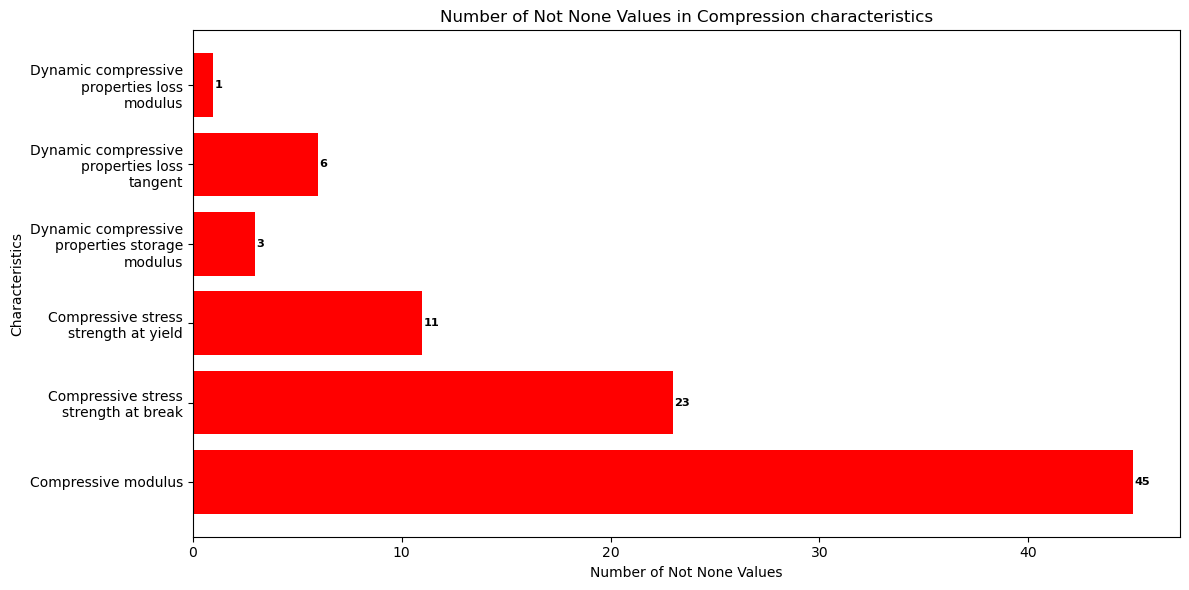

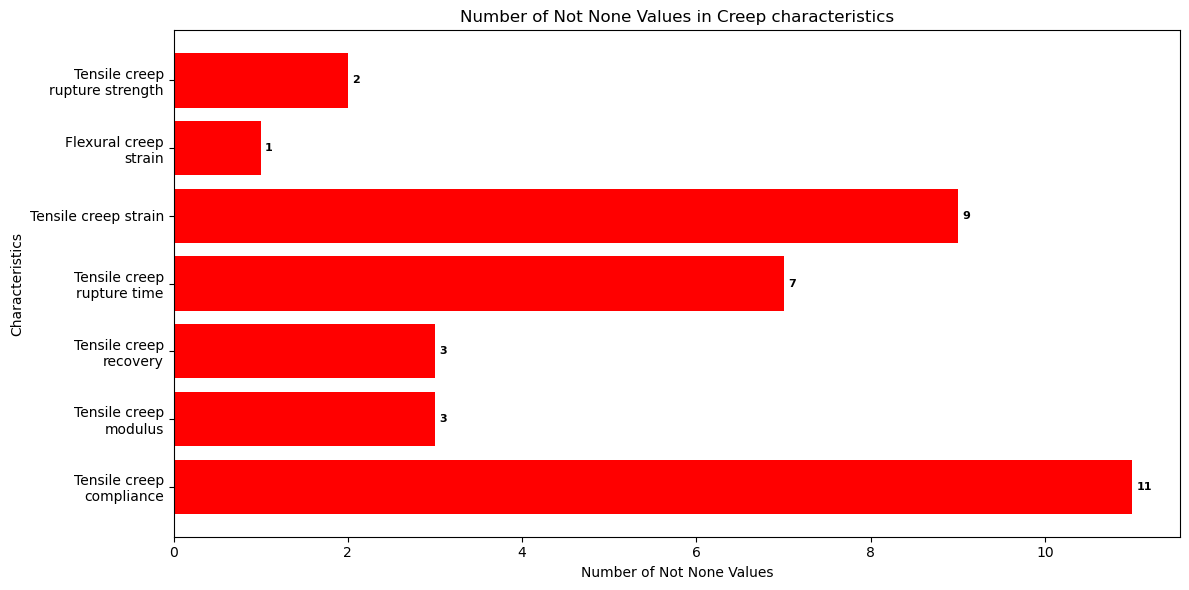

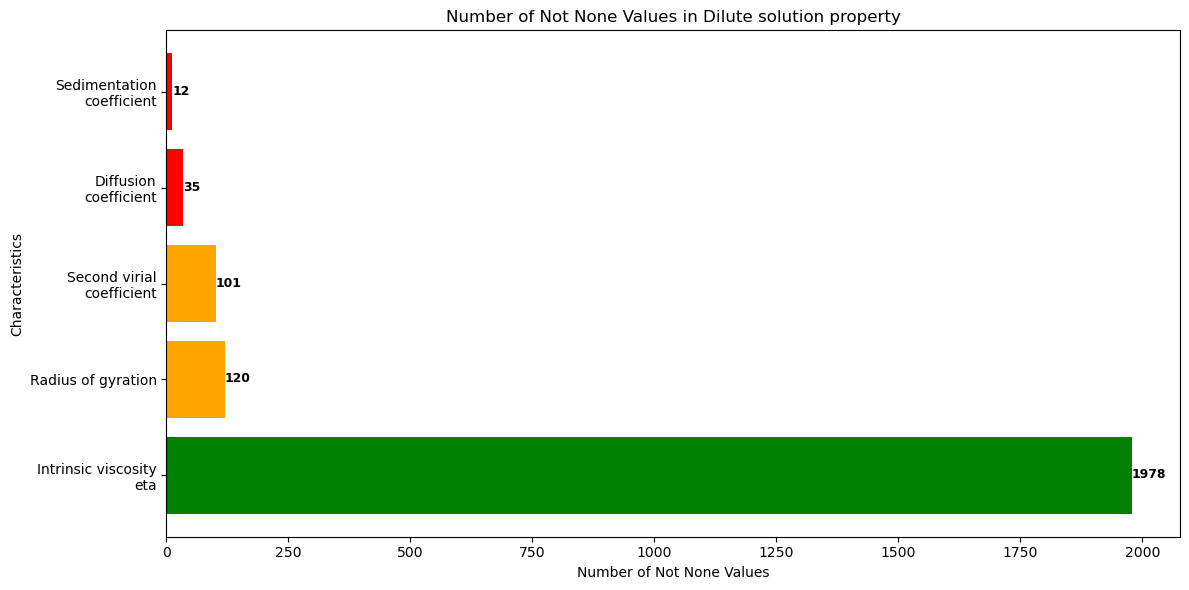

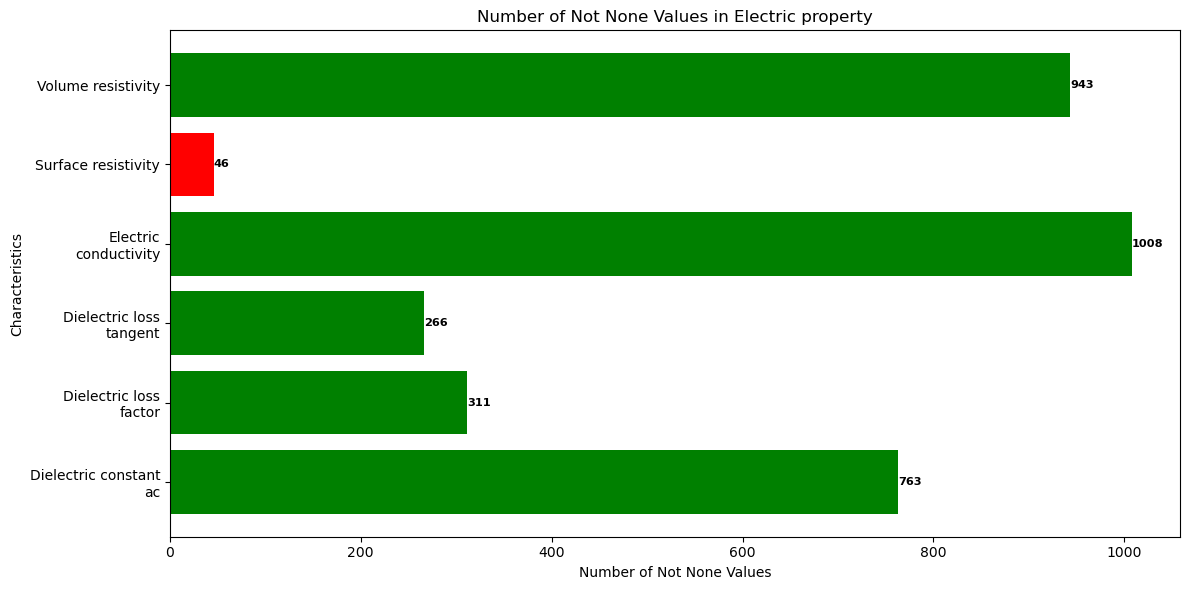

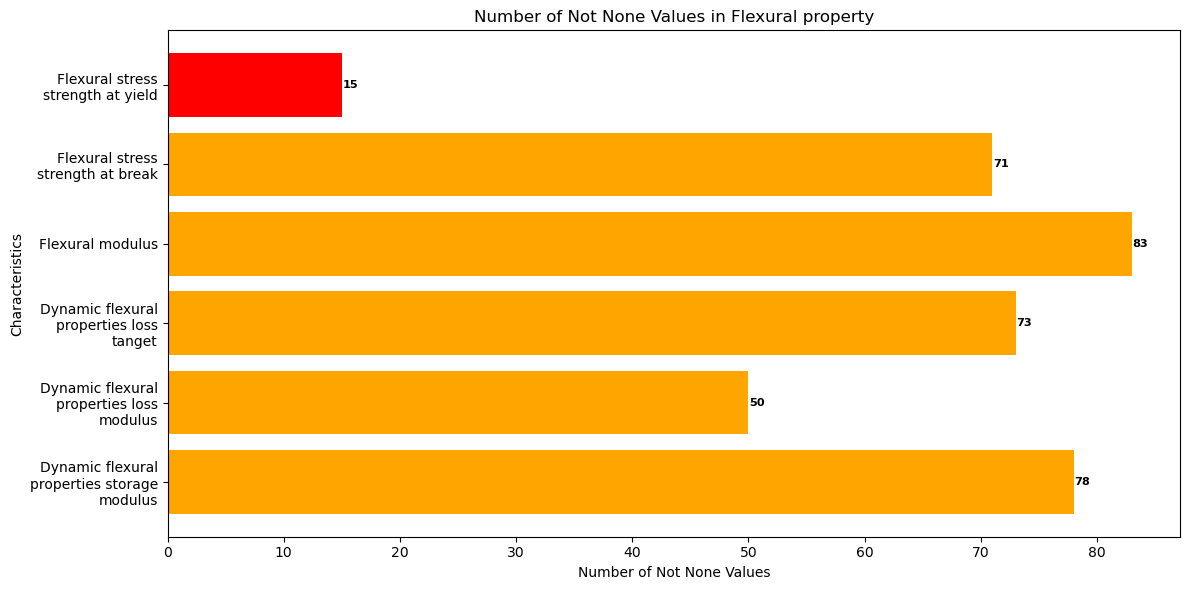

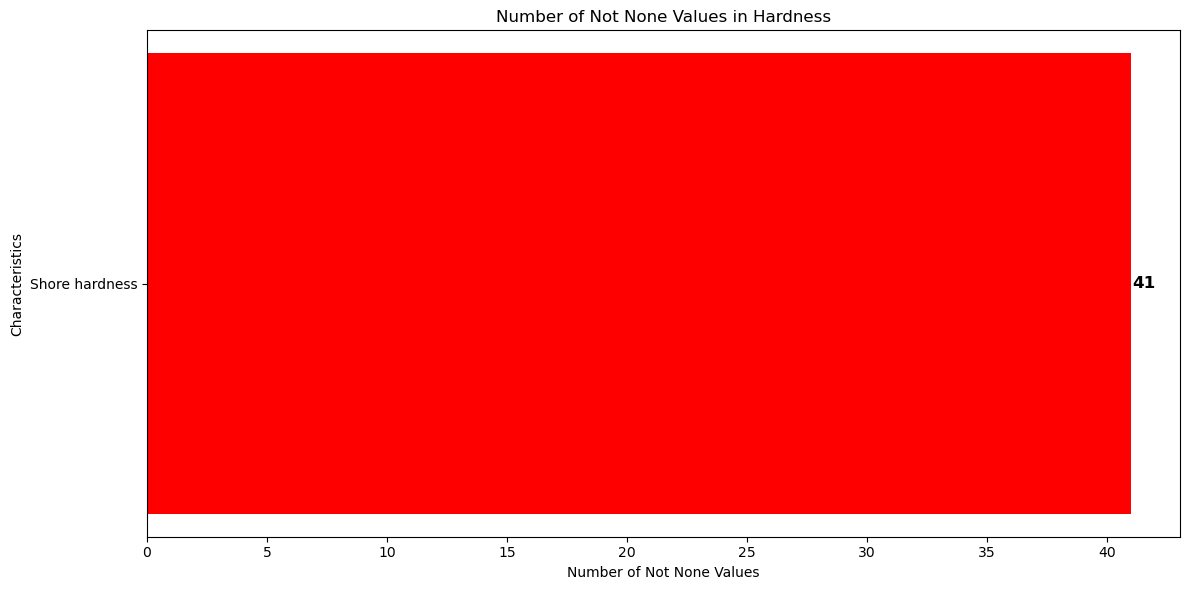

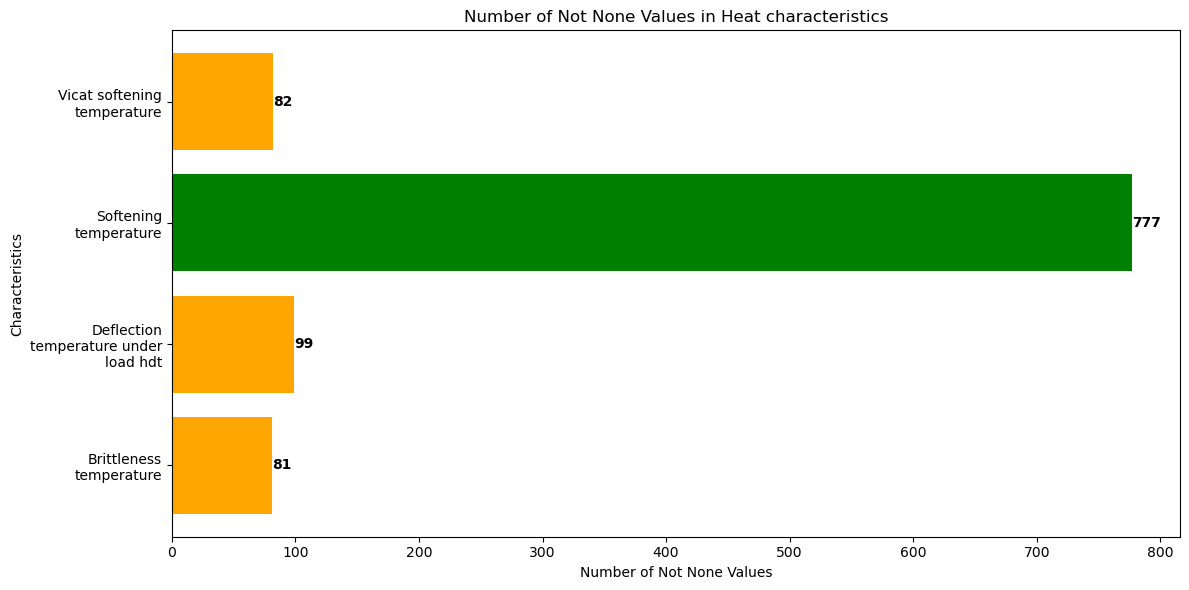

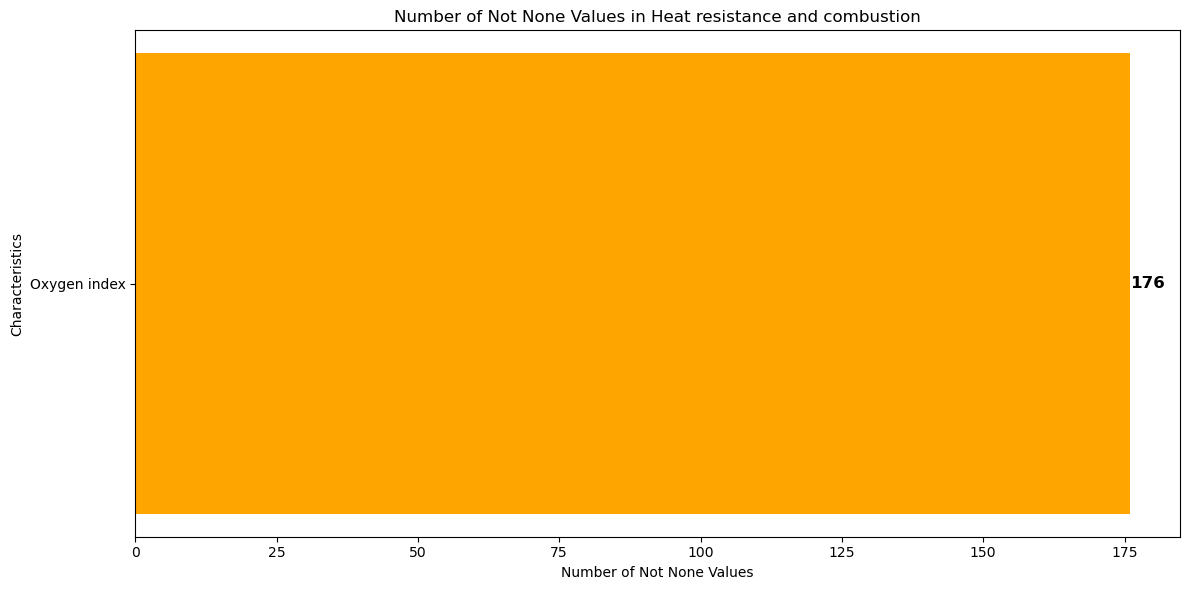

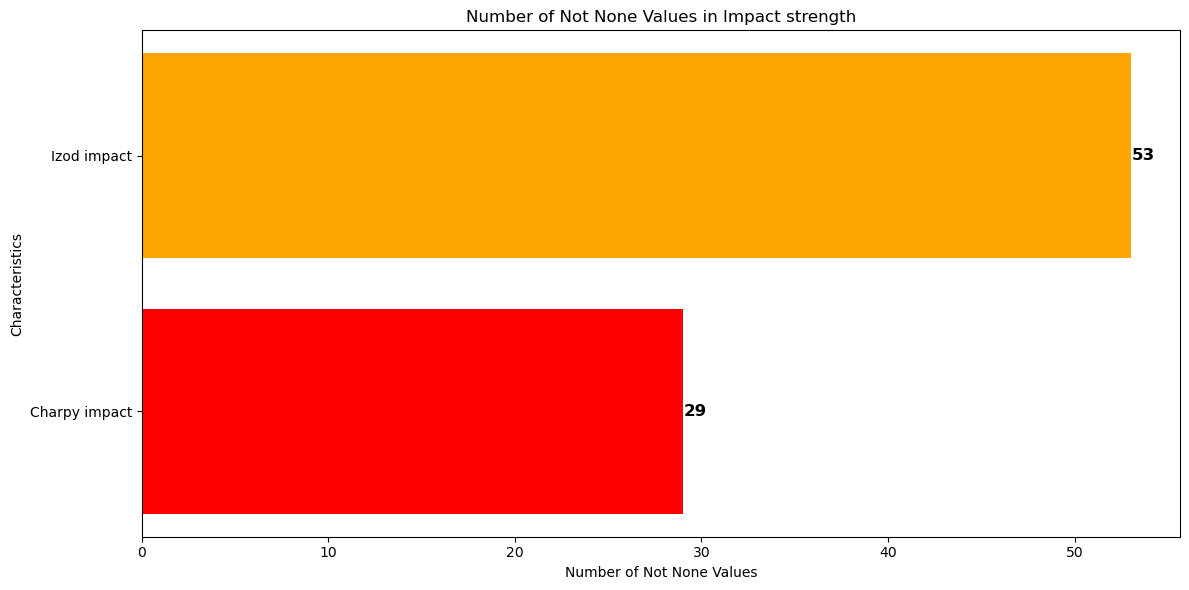

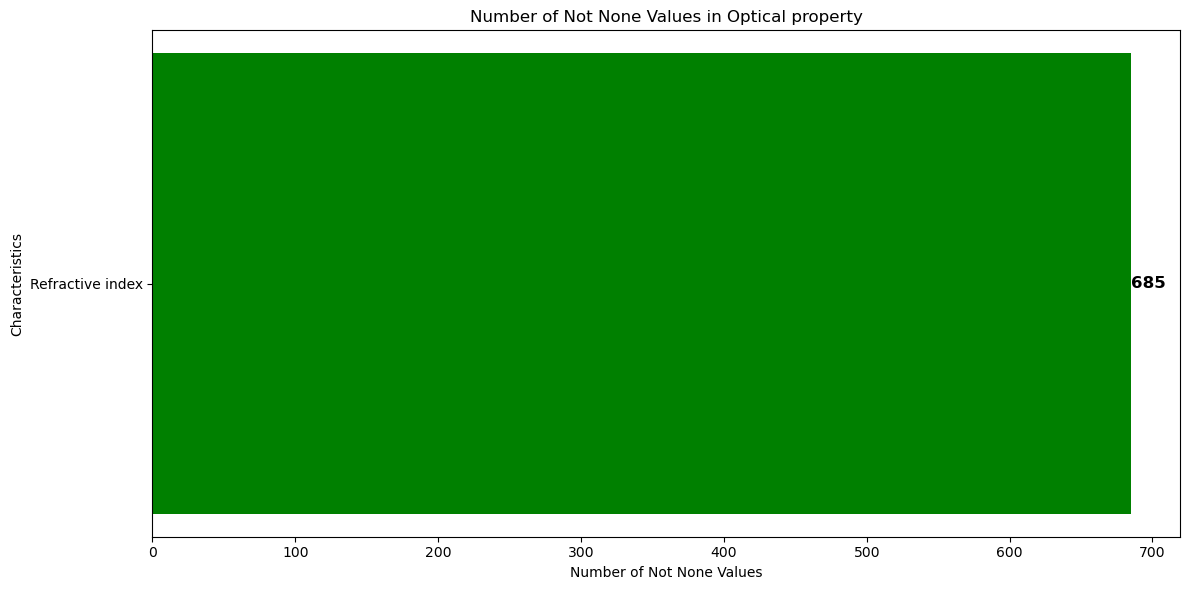

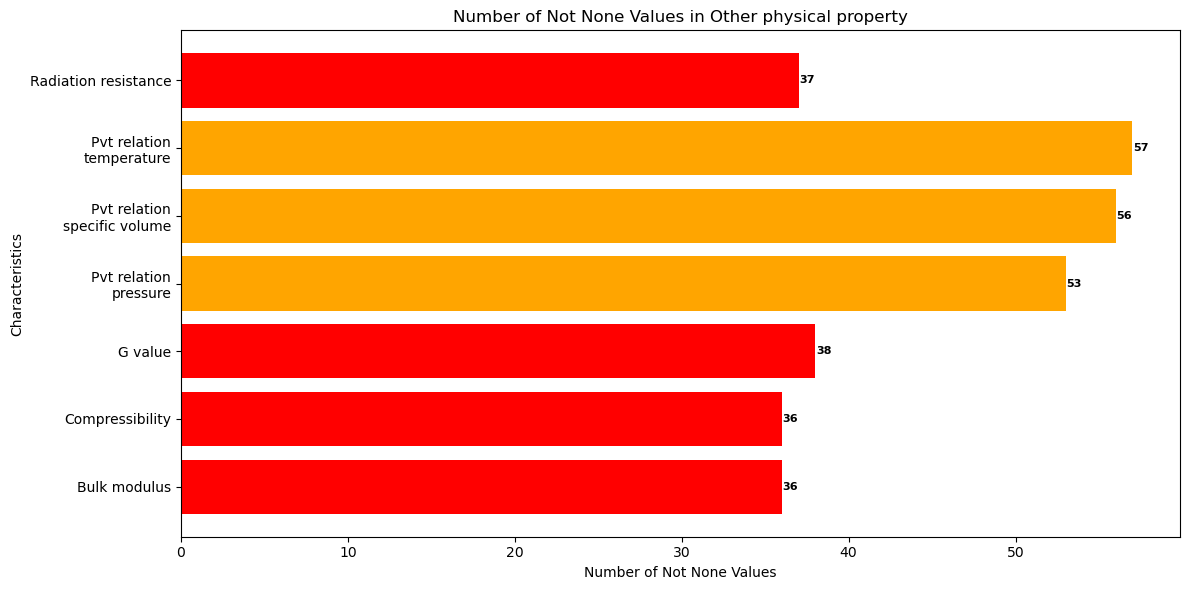

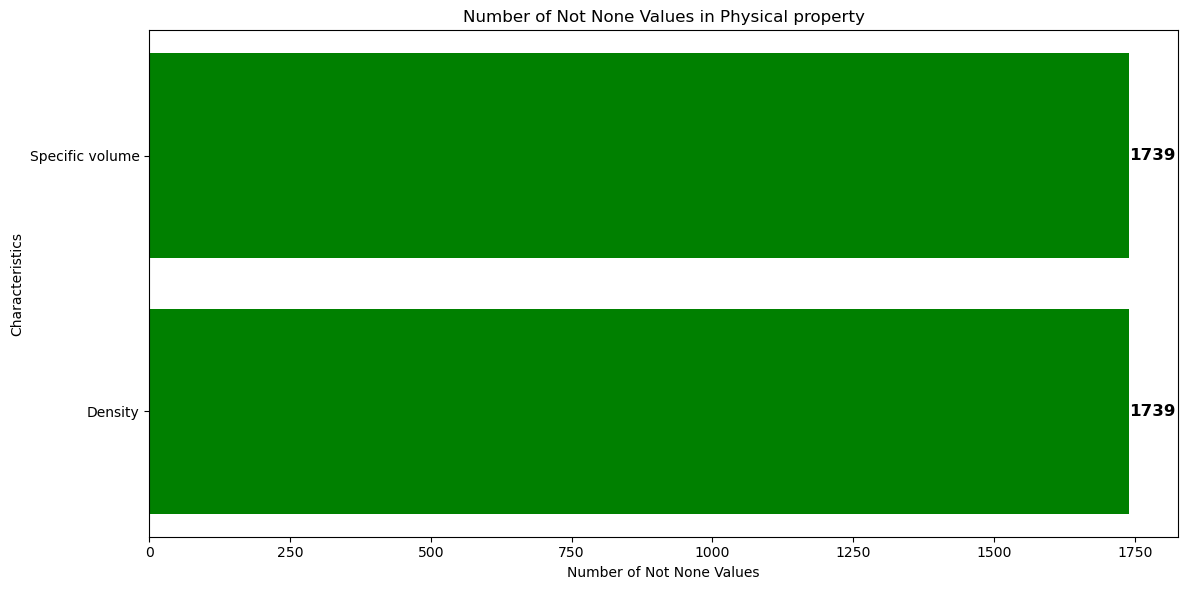

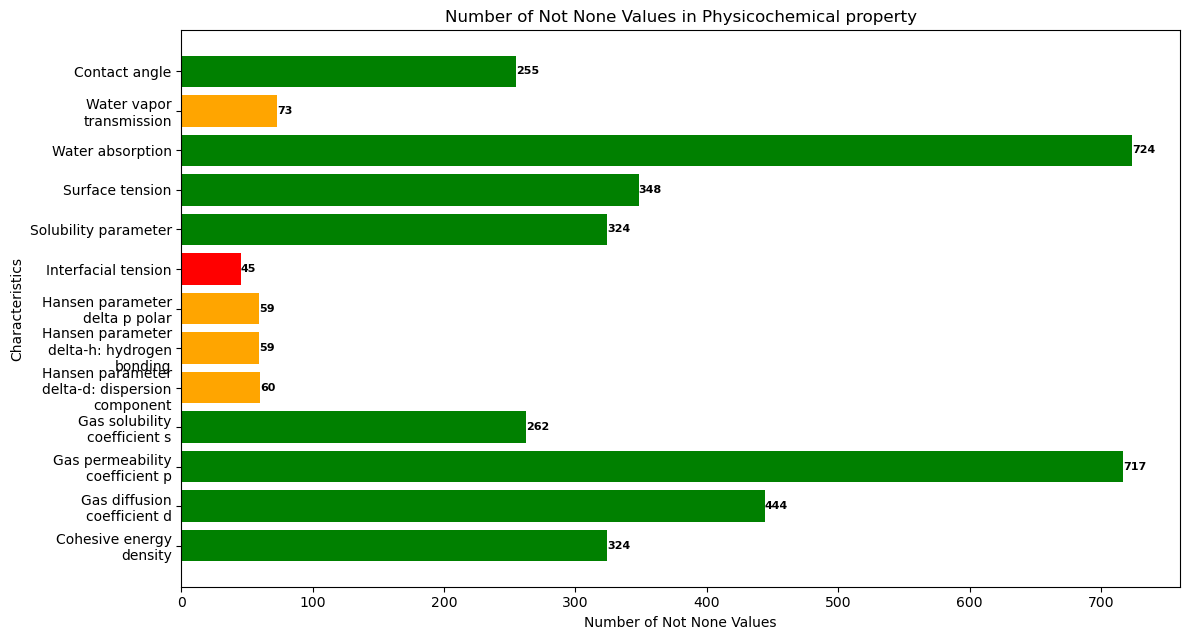

Skipping Polymer Information as it contains columns not present in DataFrame


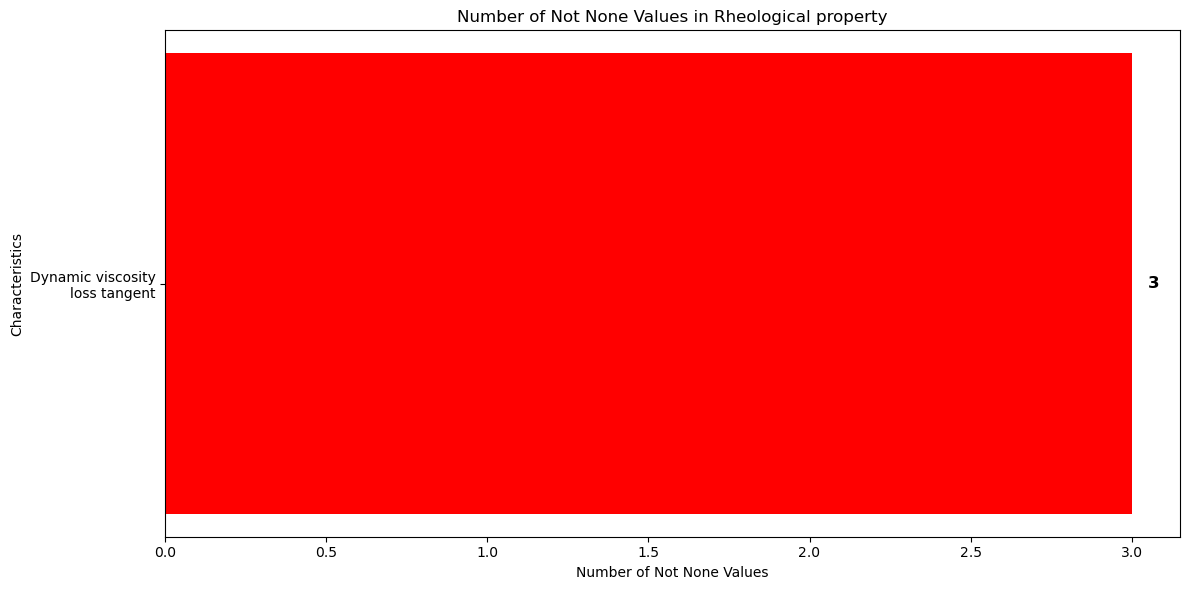

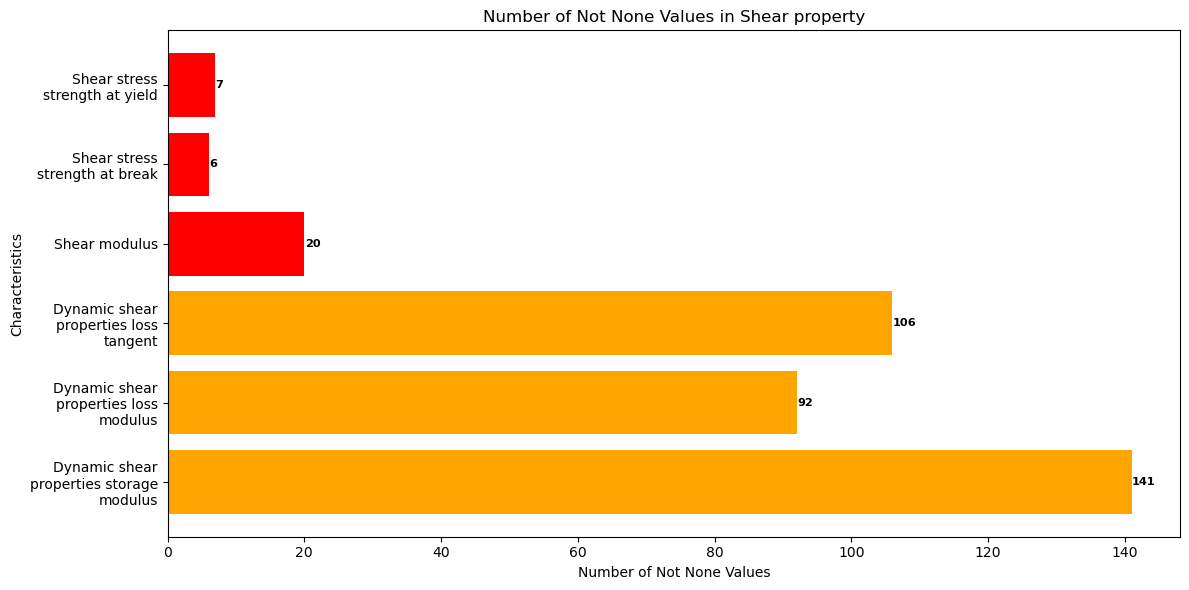

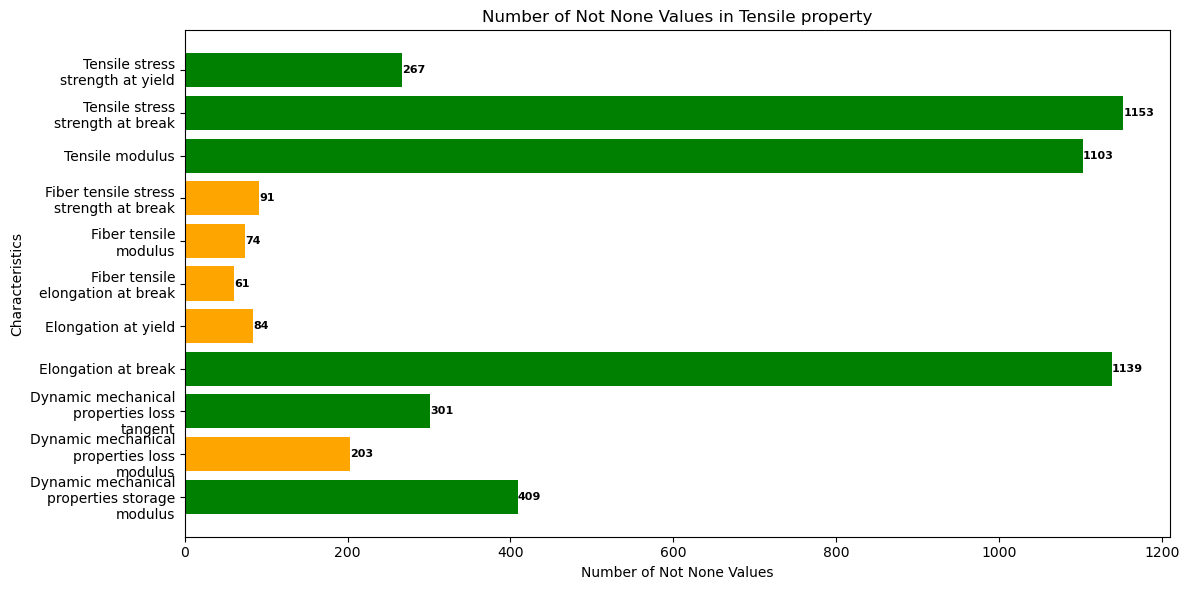

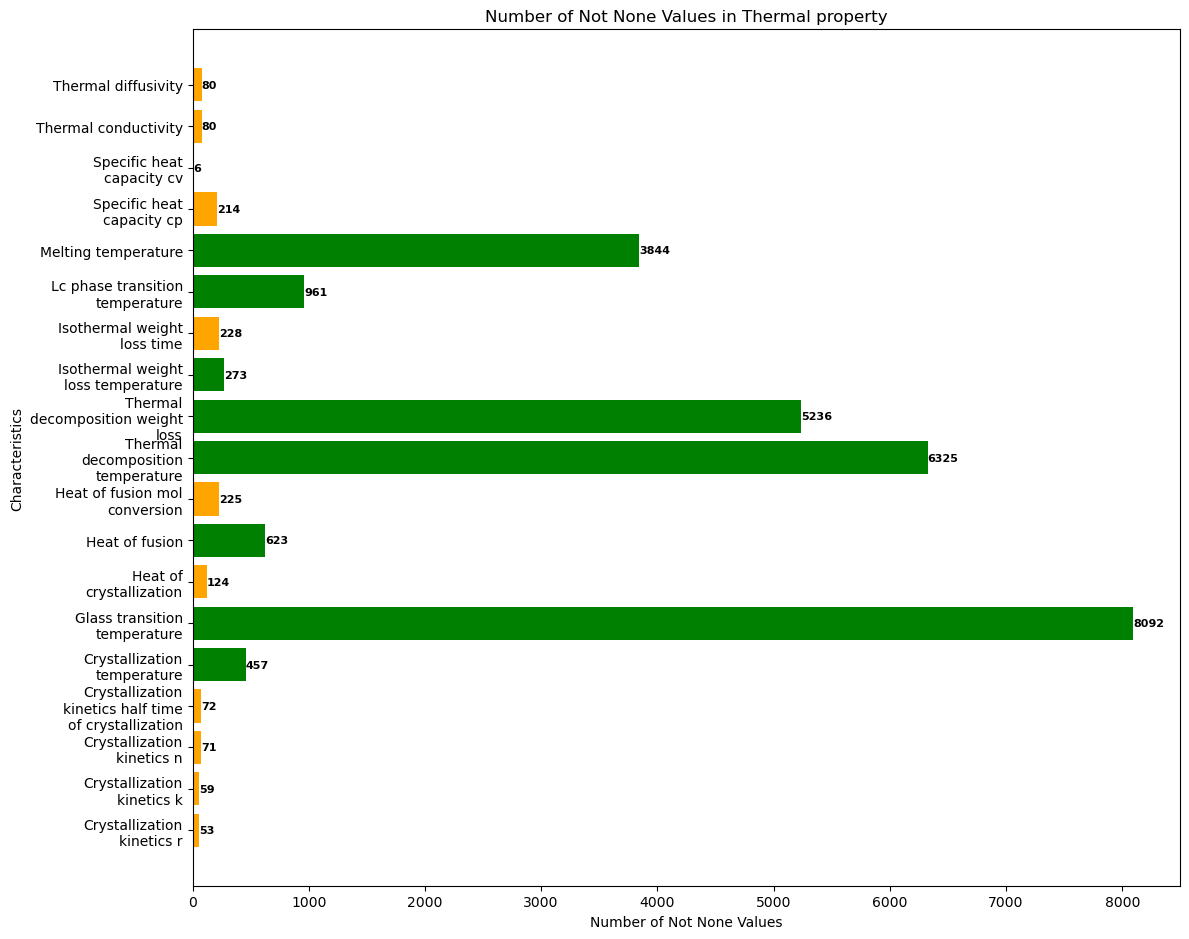

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

categs = list(data.keys())
vals = list(data.values())

for u in range(len(vals)):
    cols_value_median = vals[u]
    cols_value_median_with_suffix = [c + "_value_median" for c in cols_value_median]

    existing_cols = [col for col in cols_value_median_with_suffix if col in poly_data.columns]

    if not existing_cols:
        print(f"Skipping {categs[u]} as it contains columns not present in DataFrame")
        continue

    subset_df = poly_data[existing_cols]
    not_none_counts = subset_df.notnull().sum()
    wrapped_categs = ['\n'.join(textwrap.wrap(c, 20)) for c in cols_value_median]

    figure_height = max(6, len(wrapped_categs) * 0.5)
    fig, ax = plt.subplots(figsize=(12, figure_height))

    # Determine colors based on not_none_counts values
    colors = ['red' if x < 50 else 'orange' if 50 <= x <= 250 else 'green' for x in not_none_counts.values]

    bars = ax.barh(wrapped_categs, not_none_counts.values, color=colors)
    font_size = max(min(20 / np.sqrt(len(cols_value_median)), 12), 8)  # Dynamic font size adjustment

    for bar, value in zip(bars, not_none_counts.values):
        xval = bar.get_width()
        ax.text(xval + 0.05, bar.get_y() + bar.get_height() / 2, f'{round(value, 2)}',
                ha='left', va='center', color='black', fontsize=font_size, fontweight='bold')

    plt.xlabel('Number of Not None Values')
    plt.ylabel('Characteristics')
    plt.title(f'Number of Not None Values in {categs[u]}')

    plt.tight_layout()
    plt.savefig(f'{categs[u]}_bar_horizontal.png')
    plt.show()
